<a href="https://colab.research.google.com/github/holstbone/Neural-Networks/blob/main/A_1_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.1 Computer Vision



## Project Nature and Content - Computer Vision:

Think of the first assignment as serving multiple purposes: (1) exploring neural nets/seeing how they work on a very simple problem, (2) examining alternative neural net structures with a simple, single-hidden layer network, and (3) learning how to fit a neural network directly in Python (or Scikit Learn, TensorFlow, or Keras). This first assignment gives you a choice as to which of these objectives to emphasize.

Bottom line. You may choose the vision data set that you will be looking at, assuming that it is a simple alphabetic or numeric data classification problem. And you may choose the Python coding framework that you use to build the neural net. The neural network should be a fully connected (dense) neural network with a single hidden layer.

This first assignment deals with neural networks for classification of images. The structure of the network should be simple, with only one internal/hidden layer. The intent of the assignment is to give you hands-on, practical experience with not only designing, training, and assessing a neural network, and interpreting the impact of hyperparameters, but to go one step further. 

Regarding exploration, the goal is to understand how the neurons/nodes in a simple single-hidden layer network have learned to represent features within the input data. 

***Regarding the management problem for this assignment. Suppose you are asked to develop a neural network model for digit classification. How would you go about training such a model? How would you judge the model's accuracy in digit classification with real data examples, such as customer or client handwritten digits on paper?***

You will do this exclusively using the backpropagation learning method. You will have gathered and preprocessed your data, designed and refined your network structure, trained and tested the network, varied the hyperparameters to improve performance and analyzed/assessed the results. 

The most important thing is not just to give a summary of classification rates/errors. I trust that you can get a working classifier, or can train a network to do any useful task. 

The important things are to identify - for each different class of input data - what it is that the hidden nodes are responding to. 

**You may use MNIST data for the first assignment.**  You can train and test a classifier on this data. But the core challenge is still to figure out what it is that the hidden nodes are responding to, and making the task more complex will not change this as the core focus. You need to conduct a minimum of the following 5 experiments for this data, in order to get some useful insights. You are welcome to conduct more experiments.



### **EXPERIMENT 1:** 


Our `dense neural network` will consist of `784 input nodes`, a hidden layer with `1 node` and 10 output nodes (corresponding to the 10 digits). We use `mnist.load_data()` to get the 70,000 images divided into a set of 60,000 training images and 10,000 test images. We hold back 5,000 of the 60,000 training images for validation. After training the model, we group the 60,000 `activation` values of the hidden node for the (original) set of training images by the 10 predicted classes and visualize these sets of values using a `boxplot`. We expect the overlap between the range of values in the "boxes" to be minimal. In addition, we find the pattern that maximally activates the hidden node as a "warm up" exercise for similar analysis we will perform on `CNN` models in `Assignment 2`.



### **EXPERIMENT 2:** 


This time our `dense neural network` will have 784 input nodes, a hidden layer with `2 nodes` and 10 output nodes (corresponding to the 10 digits). For each of the 60,000 images, the output of the two hidden nodes are plotted using a `scatterplot`. We color code the points according to which of the 10 classes the the output of the two nodes predicts. Ideally, just like in `EXPERIMENT 1`, the color clusters should have very little overlap. Also compare the accuracy % & confusion matrix of Experiments 1 & 2. Again, the goal is to get more insights.



### **EXPERIMENT 3:** 



You can explore with more hidden nodes. Then end up with 1 ‘final’ model. Say the ‘best’ model.



### **EXPERIMENT 4:**


Use PCA decomposition to reduce the number of dimensions of our training set of 28x28 dimensional MNIST images from 784 to 154 (with 95% of training images variance lying along these components). We also reduce the number of dimensions of 'best' model from `Experiment 3` to 154 inputs nodes and train it on the new lower dimensional data. We then compare the performance of Experiments 3 and 4.



### **EXPERIMENT 5:** 

We use a Random Forest classifier to get the relative importance of the 784 features (pixels) of the 28x28 dimensional images in training set of MNIST images and select the top 70 features (pixels). We train our 'best' `dense neural network` using these 70 features and compare its performance to the the `dense neural network` models from EXPERIMENTS 3 and 4.



# Andy's Work Starts Here:

In [ ]:
!python --version

Python 3.7.10


## Import Packages



In [ ]:
# Helper libraries

from time import time
import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics libraries
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

# Array and Dataframe libraries
import numpy as np
import pandas as pd

# # TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [ ]:
print('The matplotlib version is {}.'.format(mpl.__version__))
print('The numpy version is {}.'.format(np.__version__))
print('The tensorflow version is {}.'.format(tf.__version__))
print('The pandas version is {}.'.format(tf.__version__))
print('The scikit learn version is {}.'.format(sklearn.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

The matplotlib version is 3.2.2.
The numpy version is 1.19.5.
The tensorflow version is 2.5.0.
The pandas version is 2.5.0.
The scikit learn version is 0.22.2.post1.
The seaborn version is 0.11.1.


In [ ]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True) 

## Load MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Pre-Process Data

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in the [0, 1] interval.

Our training images are stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval.

We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

### Apply one-hot encoding on the labels (Optional)

In Experiment 1, we use the original y-outputs. Since we will be using `sparse_categorical_crossentropy` as the loss function we do not need to use `to_categorical` to convert the class vector of labels to binary matrix representation.

In [ ]:
#y_train_encoded = to_categorical(y_train)
#y_test_encoded = to_categorical(y_test)

### Reshape the images to 1D arrays

In [ ]:
# Reshape the images:
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

In [ ]:
x_train.shape

(60000, 784)

### Rescale the elements of the reshaped images

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Validating our approach

We set apart 5,000 samples of our training data to use as a validation set.

In [ ]:
x_val, x_train = x_train[:5000], x_train[5000:] 
y_val, y_train = y_train[:5000], y_train[5000:]

# **EXPERIMENT 1:** 


Our `dense neural network` will consist of `784 input nodes`, a hidden layer with `1 node` and 10 output nodes (corresponding to the 10 digits). We use `mnist.load_data()` to get the 70,000 images divided into a set of 60,000 training images and 10,000 test images. We hold back 5,000 of the 60,000 training images for validation. After training the model, we group the 60,000 `activation` values of the hidden node for the (original) set of training images by the 10 predicted classes and visualize these sets of values using a `boxplot`. We expect the overlap between the range of values in the "boxes" to be minimal. In addition, we find the pattern that maximally activates the hidden node as a "warm up" exercise for similar analysis we will perform on `CNN` models in `Assignment 2`.



## Creating the NN Model

### Specify the network architecture

### Build the NN model

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers.

The first `Dense` layer, the hidden layer, consists of just `one node`.

The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

In [ ]:
model_1 = Sequential([
    Dense(input_shape=[784], units = 1, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
_________________________________________________________________
output_layer (Dense)         (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


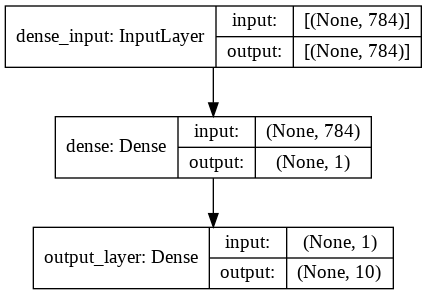

In [ ]:
keras.utils.plot_model(model_1, "mnist_model.png", show_shapes=True) 

### Compile the NN model

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

In [ ]:
model_1.compile(optimizer='rmsprop',           
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

### Train the NN model

We are now ready to train our network, which in Keras is done via a call to the fit method of the network: we "fit" the model to its training data. We train the model for 30 epochs with batch size 32 (the default).

In [ ]:
history_1 = model_1.fit(
    x_train
    ,y_train
    ,epochs = 30
    ,validation_data=(x_val, y_val)
    #,validation_split=0.0833 
    #,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)]
) 

Epoch 1/30
1719/1719 [==============================] - 7s 2ms/step - loss: 1.9479 - accuracy: 0.2327 - val_loss: 1.7948 - val_accuracy: 0.3020
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.7272 - accuracy: 0.2936 - val_loss: 1.6712 - val_accuracy: 0.3348
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.6448 - accuracy: 0.3429 - val_loss: 1.6192 - val_accuracy: 0.3632
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.6055 - accuracy: 0.3555 - val_loss: 1.5856 - val_accuracy: 0.3774
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.5811 - accuracy: 0.3661 - val_loss: 1.5655 - val_accuracy: 0.3780
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.5655 - accuracy: 0.3720 - val_loss: 1.5536 - val_accuracy: 0.3812
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.5536 - accuracy: 0.3755 - val_loss: 1.5418 - val_accuracy:

### Evaluate the NN model

Evaluate the model on the test dataset.

In [ ]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy_1 * 100)

313/313 [==============================] - 0s 2ms/step - loss: 1.5496 - accuracy: 0.3967
test set accuracy:  39.6699994802475


## Making Predictions

In [ ]:
preds_1 = model_1.predict(x_test)
print('shape of preds: ', preds_1.shape)

shape of preds:  (10000, 10)


## Reviewing Performance

In [ ]:
history_dict_1 = history_1.history
history_dict_1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot performance metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
losses_1 = history_1.history['loss']
accs_1 = history_1.history['accuracy']
val_losses_1 = history_1.history['val_loss']
val_accs_1 = history_1.history['val_accuracy']
epochs_1 = len(losses_1)

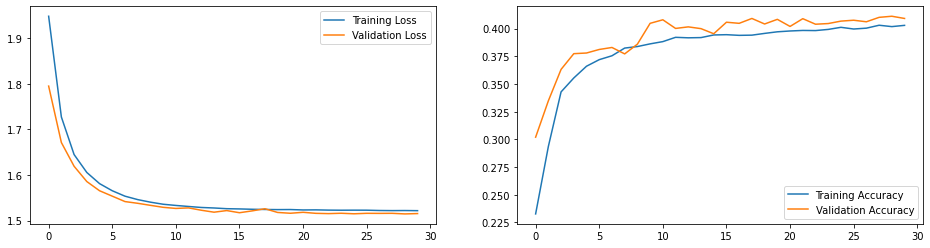

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_1, accs_1], [val_losses_1, val_accs_1], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_1), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_1), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Create the confusion matrix

In [ ]:
# Get the predicted classes:
pred_classes_1 = np.argmax(model_1.predict(x_train), axis=-1)
pred_classes_1

array([7, 3, 7, ..., 8, 6, 8])

In [ ]:
df_pred_classes_1 = pd.DataFrame(pred_classes_1)
df_pred_classes_1[0].unique()

array([7, 3, 2, 1, 0, 6, 4, 8, 5])

In [ ]:
#conf_mx_1 = tf.math.confusion_matrix(y_test, pred_classes_1)
conf_mx_1 = confusion_matrix(y_train, pred_classes_1)
conf_mx_1;

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:

df_1 = pd.DataFrame(preds_1[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df_1.style.format("{:.2%}").background_gradient(cmap=cm)

### Visualize the confusion matrix

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

We use code from chapter 3 of Hands on Machine Learning (A. Geron) (cf. https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb) to display a "heat map" of the confusion matrix. Then we normalize the confusion matrix so we can compare error rates.

See https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch03.html#classification_chapter

Note that the rows represent actual classes while the columns represent predicted classes.

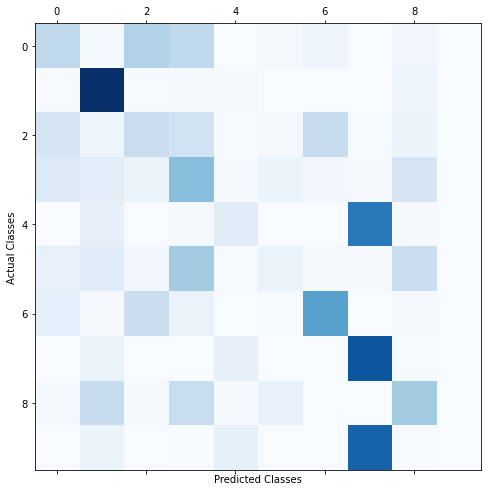

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx_1, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Confusion Matrix Error Rates

The confusion matrix does not look good. Only diagonal cells should be "lit up". Let us normalize the confusion matrix to get the error rates.

In [ ]:
row_sums_1 = conf_mx_1.sum(axis=1, keepdims=True)
norm_conf_mx_1 = conf_mx_1 / row_sums_1

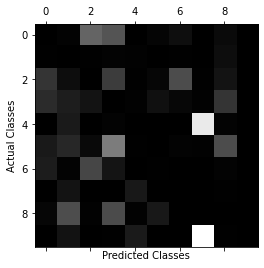

In [ ]:
np.fill_diagonal(norm_conf_mx_1, 0)
plt.matshow(norm_conf_mx_1, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

Looks like a lot of 7 digits were misclassified as 4's and 9's. Let's plot examples of 7's and 4's to try to determine what went wrong here.


In [ ]:
def plot_digits(instances, pos, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    pos.imshow(image, cmap = 'binary', **options)
    pos.axis("off")

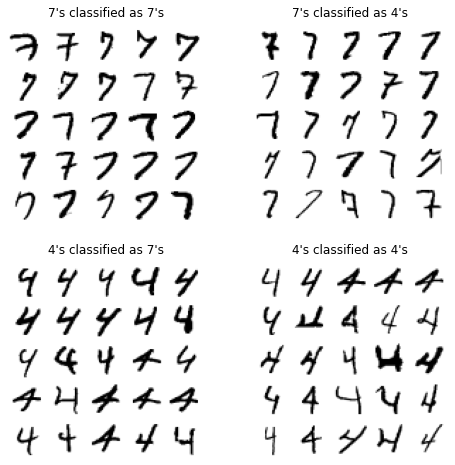

In [ ]:
cl_a, cl_b = 7, 4
X_aa = x_train[(y_train == cl_a) & (pred_classes_1 == cl_a)]
X_ab = x_train[(y_train == cl_a) & (pred_classes_1 == cl_b)]
X_ba = x_train[(y_train == cl_b) & (pred_classes_1 == cl_a)]
X_bb = x_train[(y_train == cl_b) & (pred_classes_1 == cl_b)]

plt.figure(figsize=(8,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

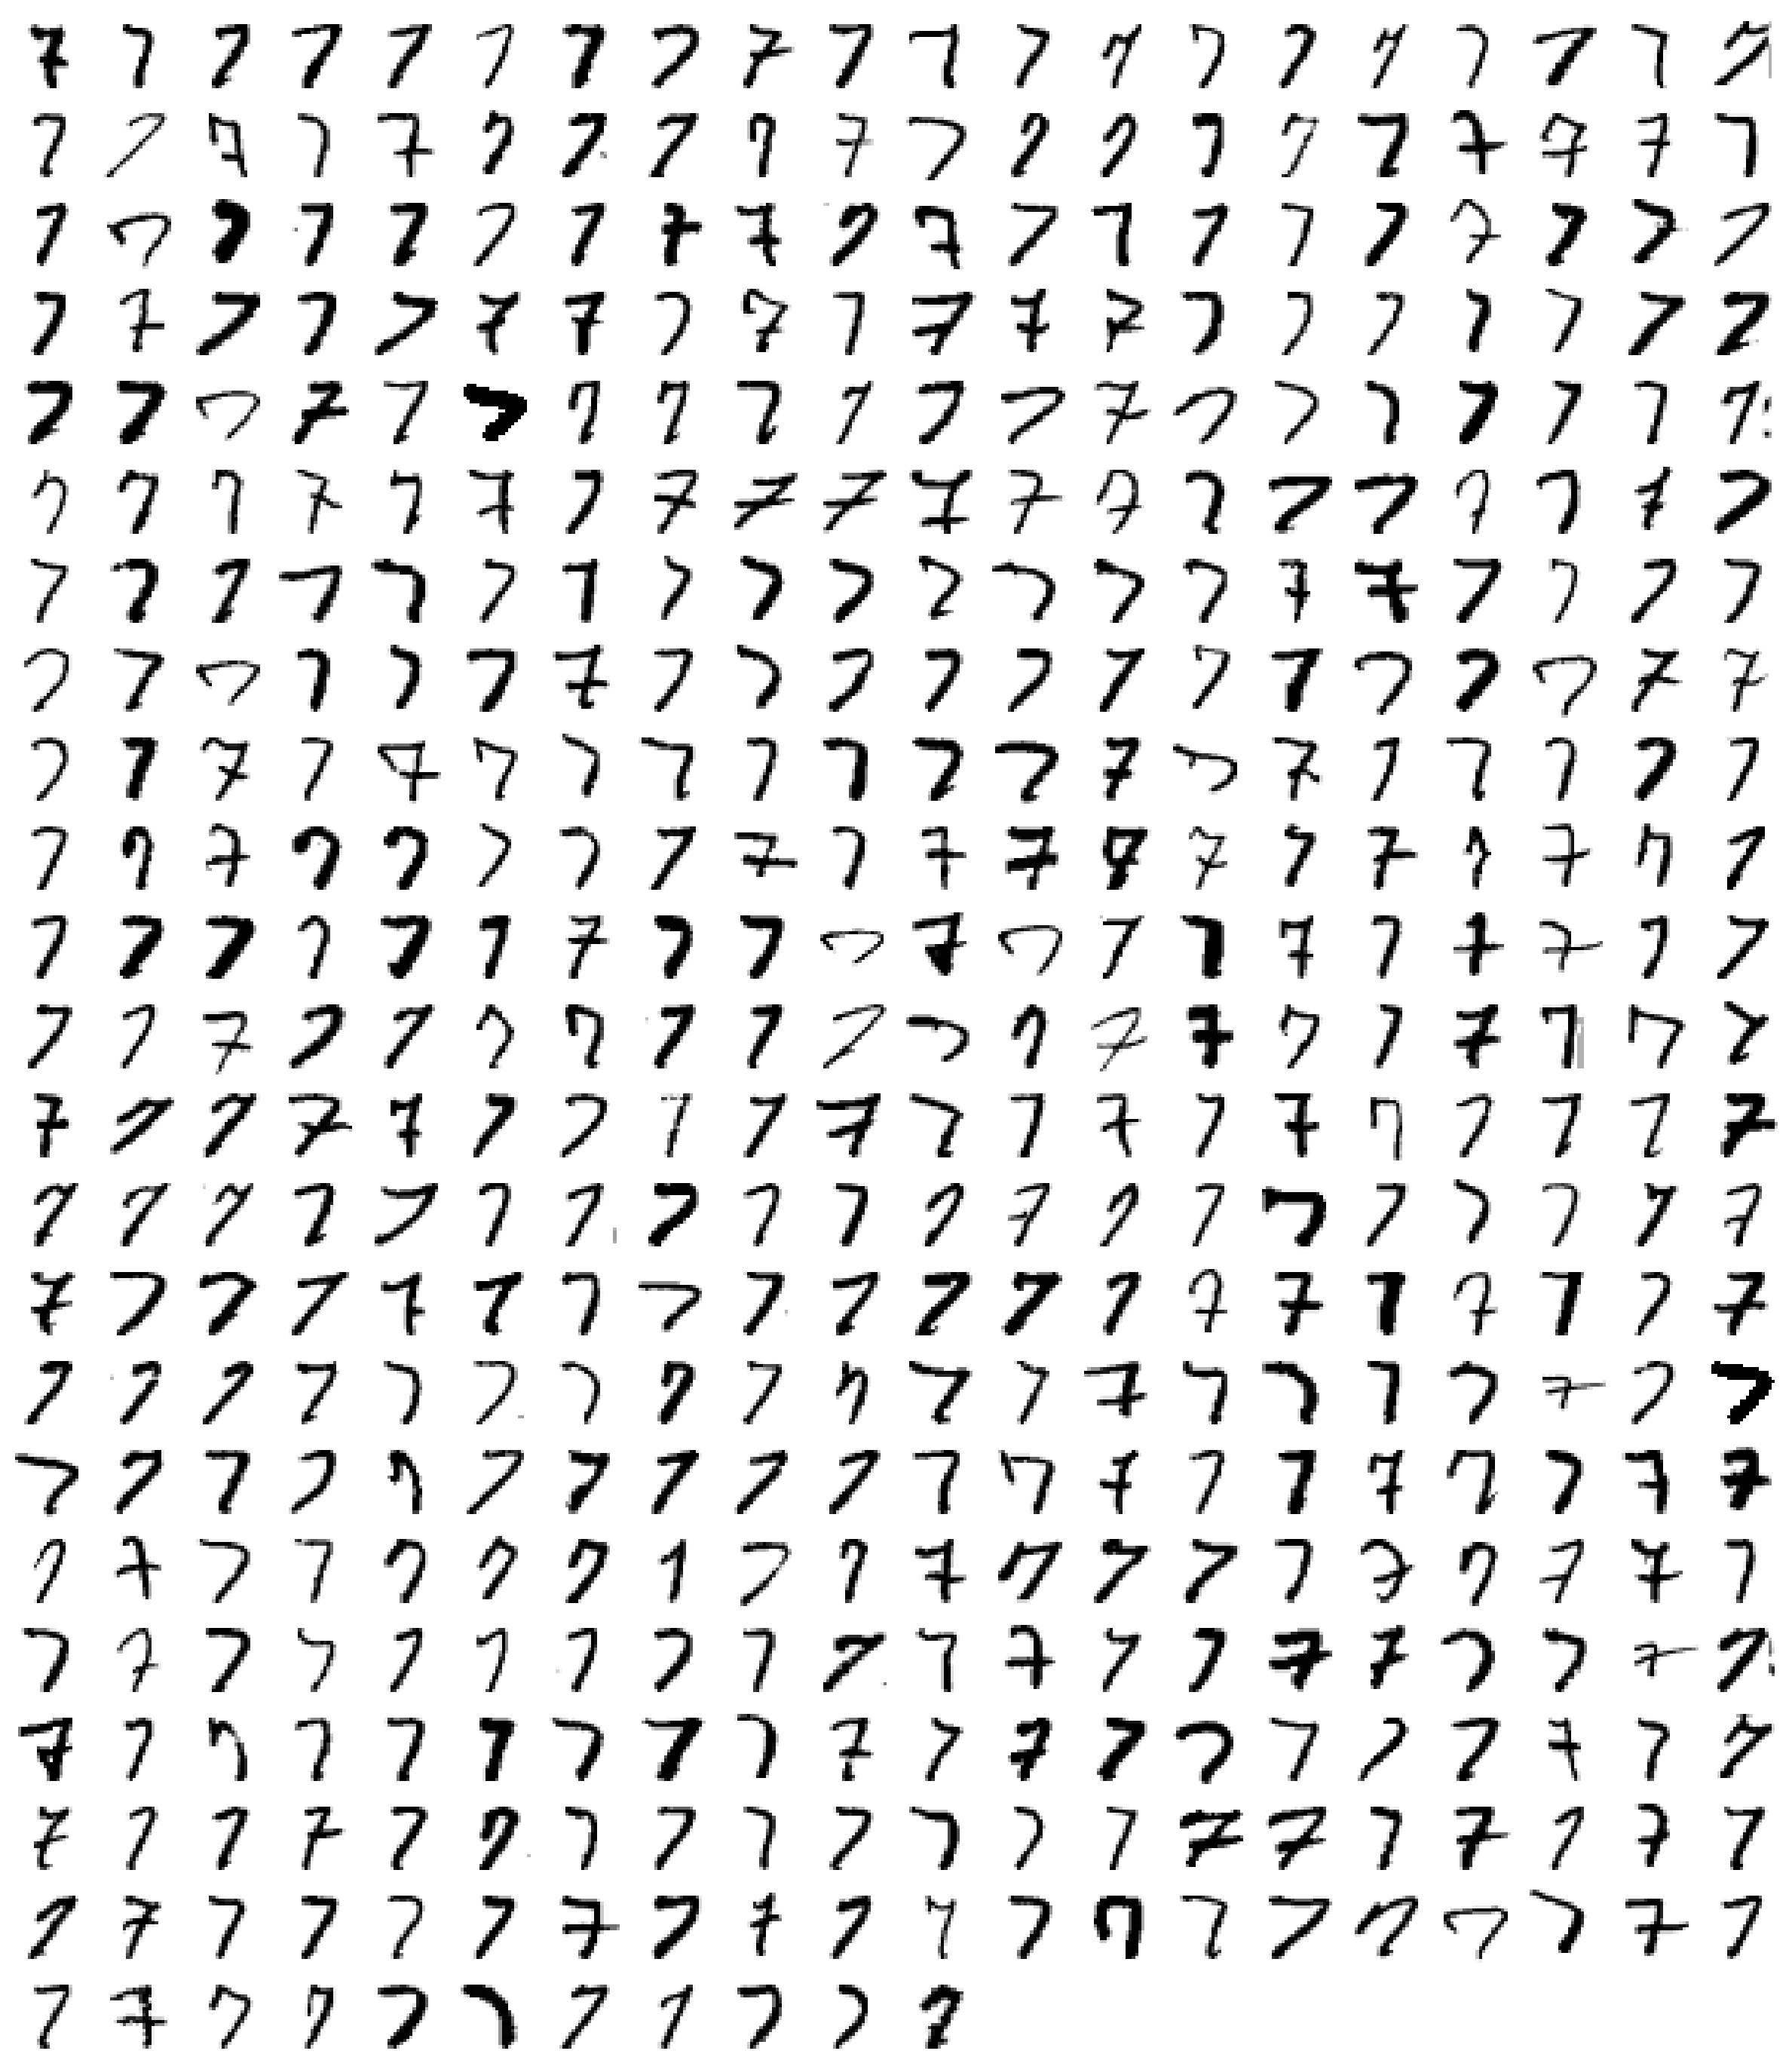

In [ ]:
# display all the 7's classified as 4's
num = X_ab.shape[0]
plt.figure(figsize=(50,50))
plot_digits(X_ab[:num],plt, images_per_row = 20)

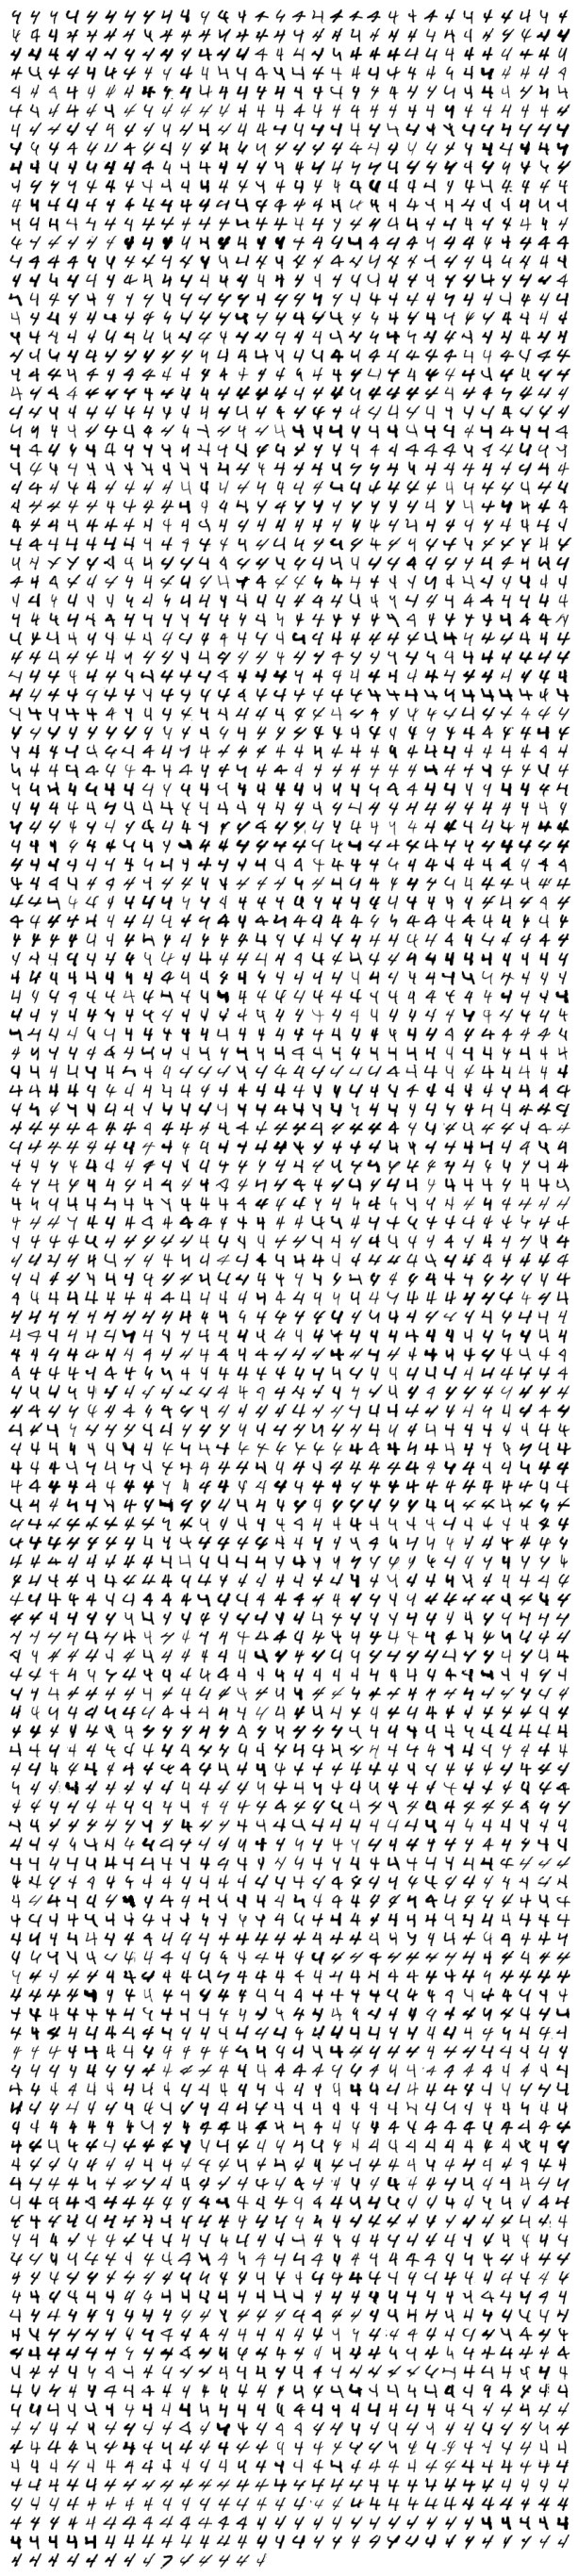

In [ ]:
# display all the 4's classified as 7's
num = X_ba.shape[0]
plt.figure(figsize=(50,50))
plot_digits(X_ba[:num],plt, images_per_row = 30)

## Analyzing the Activation Values of the Hidden Nodes


 ### Get the activation values of the hidden nodes
 
To get the activation values of the hidden nodes, we need to create a new model, `activation_model`, that takes the same input as our current model but outputs the activation value of the hidden layer, i.e. of the hidden node. Then use the `predict` function to get the activation values.

In [ ]:
# Extracts the outputs of the 2 layers:
layer_outputs_1 = [layer.output for layer in model_1.layers]

# Creates a model that will return these outputs, given the model input:
activation_model_1 = Model(inputs=model_1.input, outputs=layer_outputs_1)

print(f"There are {len(layer_outputs_1)} layers")
layer_outputs_1 # description of the layers

There are 2 layers


[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'output_layer')>]

In [ ]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations_1 = activation_model_1.predict(x_train)
hidden_layer_activation_1 = activations_1[0]
output_layer_activations_1 = activations_1[1]
hidden_layer_activation_1.shape   #  each of the 1 hidden nodes has one activation value per training image

(55000, 1)

In [ ]:
output_layer_activations_1.shape

(55000, 10)

In [ ]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation_1.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 95.75070190429688


In [ ]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation_1 = activations_1[1]
print(f"The output node has shape {ouput_layer_activation_1.shape}")
print(f"The output for the first image are {ouput_layer_activation_1[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation_1[0].sum()}")

The output node has shape (55000, 10)
The output for the first image are [0.    0.037 0.    0.    0.278 0.001 0.    0.352 0.003 0.329]
The sum of the probabilities is (approximately) 1.0


 ### Create a dataframe with the activation values and the class labels

In [ ]:
#Get the dataframe of all the node values

# activation_data_1 = {'actual_class':y_train}
# for k in range(0,1): 
#    activation_data_1[f"act_val_{k}"] = hidden_layer_activation_1[:,k]
# activation_df_1 = pd.DataFrame(activation_data_1)

activation_df_1 = pd.DataFrame({'act_value':hidden_layer_activation_1.reshape(55000),
                                'pred_class':pred_classes_1})

activation_df_1.head(5).round(3)

act_value  pred_class
0      0.000           7
1      5.648           3
2      0.000           7
3      9.914           2
4      2.540           1

In [ ]:
activation_df_1['pred_class'].unique()

array([7, 3, 2, 1, 0, 6, 4, 8, 5])

 ### Visualize the activation values with boxplots

We combine the activation values of the one hidden node with the corresponding predicted classes into a DataFrame. We use both `matplotlib` and `seaborn` to create boxplots from the DataFrame.

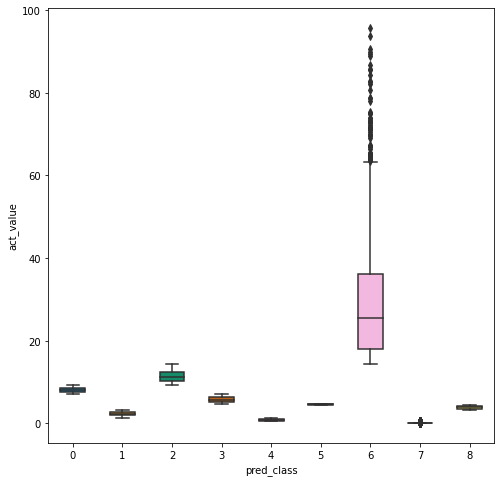

In [ ]:
# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
plt.figure(figsize=(8, 8))
bplot_1 = sns.boxplot(y='act_value', x='pred_class', 
                 data=activation_df_1[['act_value','pred_class']], 
                 width=0.5,
                 palette="colorblind")

In [ ]:
# displaying the range of activation values for each class labels
activation_df_1.groupby("pred_class")["act_value"].apply(lambda x: [round(min(x.tolist()),2),
 round(max(x.tolist()),2)]).reset_index().rename(columns={"act_value": "range_of_act_values"})

pred_class range_of_act_values
0           0        [7.08, 9.23]
1           1         [1.13, 3.2]
2           2       [9.23, 14.27]
3           3         [4.7, 7.08]
4           4        [0.41, 1.12]
5           5         [4.39, 4.7]
6           6      [14.27, 95.75]
7           7         [0.0, 0.41]
8           8         [3.2, 4.39]

In [ ]:
# displaying the mean of activation values for each class labels
activation_df_1.groupby("pred_class")["act_value"].mean().reset_index()

pred_class  act_value
0           0   8.064662
1           1   2.242583
2           2  11.334287
3           3   5.772311
4           4   0.730912
5           5   4.542516
6           6  28.330433
7           7   0.021013
8           8   3.807041

# **EXPERIMENT 2:** 


This time our `dense neural network` will have 784 input nodes, a hidden layer with `2 nodes` and 10 output nodes (corresponding to the 10 digits). For each of the 60,000 images, the output of the two hidden nodes are plotted using a `scatterplot`. We color code the points according to which of the 10 classes the the output of the two nodes predicts. Ideally, just like in `EXPERIMENT 1`, the color clusters should have very little overlap. Also compare the accuracy % & confusion matrix of Experiments 1 & 2. Again, the goal is to get more insights.



## Creating the NN Model

### Specify the network architecture

### Build the NN model

In [ ]:
model_2 = Sequential([
    Dense(input_shape=[784], units = 2, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 1570      
_________________________________________________________________
output_layer (Dense)         (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


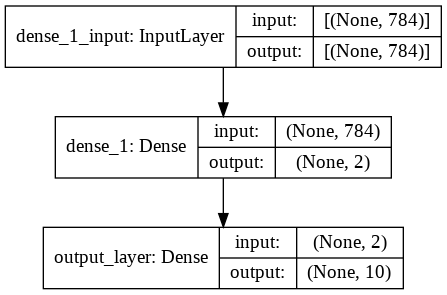

In [ ]:
keras.utils.plot_model(model_2, "mnist_model.png", show_shapes=True) 

### Compile the NN model

In [ ]:
model_2.compile(optimizer='rmsprop',           
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

### Train the DNN model

In [ ]:
history_2 = model_2.fit(
    x_train
    ,y_train
    ,epochs = 30
    ,validation_data=(x_val, y_val)
    #,validation_split=0.0833 
    #,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)]
) 

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.6531 - accuracy: 0.3926 - val_loss: 1.3473 - val_accuracy: 0.4976
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.2648 - accuracy: 0.5270 - val_loss: 1.1797 - val_accuracy: 0.5650
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1687 - accuracy: 0.5670 - val_loss: 1.1142 - val_accuracy: 0.5886
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1227 - accuracy: 0.5852 - val_loss: 1.0821 - val_accuracy: 0.6134
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0977 - accuracy: 0.5997 - val_loss: 1.0579 - val_accuracy: 0.6144
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0815 - accuracy: 0.6125 - val_loss: 1.0464 - val_accuracy: 0.6368
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0700 - accuracy: 0.6213 - val_loss: 1.0456 - val_accuracy:

### Evaluate the NN model

In [ ]:
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy_2 * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.9936 - accuracy: 0.6702
test set accuracy:  67.0199990272522


## Making Predictions

In [ ]:
preds_2 = model_2.predict(x_test)
print('shape of preds: ', preds_2.shape)

shape of preds:  (10000, 10)


## Reviewing Performance

In [ ]:
history_dict_2 = history_2.history
history_dict_2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot performance metrics 

In [ ]:
losses_2 = history_2.history['loss']
accs_2 = history_2.history['accuracy']
val_losses_2 = history_2.history['val_loss']
val_accs_2 = history_2.history['val_accuracy']
epochs_2 = len(losses_2)

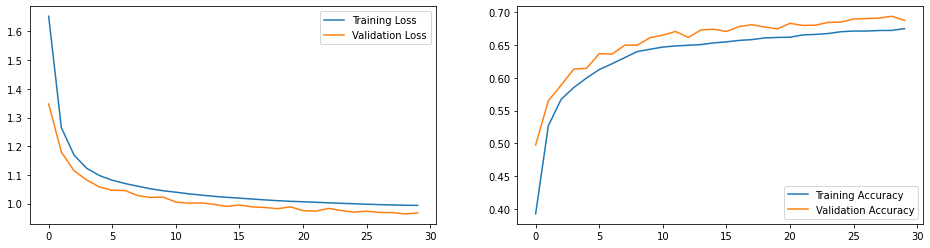

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_2, accs_2], [val_losses_2, val_accs_2], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_2), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_2), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Create the confusion matrix

In [ ]:
# Get the predicted classes:
pred_classes_2 = np.argmax(model_2.predict(x_train), axis=-1)
pred_classes_2

#Alt Code (Deprecated)
#pred_classes_2 = model_2.predict_classes(x_test)
#pred_classes_2

array([7, 3, 9, ..., 8, 6, 8])

In [ ]:
#conf_mx_2 = tf.math.confusion_matrix(y_test, pred_classes_2)
conf_mx_2 = confusion_matrix(y_train, pred_classes_2)
conf_mx_2;

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df_2 = pd.DataFrame(preds_2[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df_2.style.format("{:.2%}").background_gradient(cmap=cm)

### Visualize the confusion matrix

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Note that the rows represent actual classes while the columns represent predicted classes.

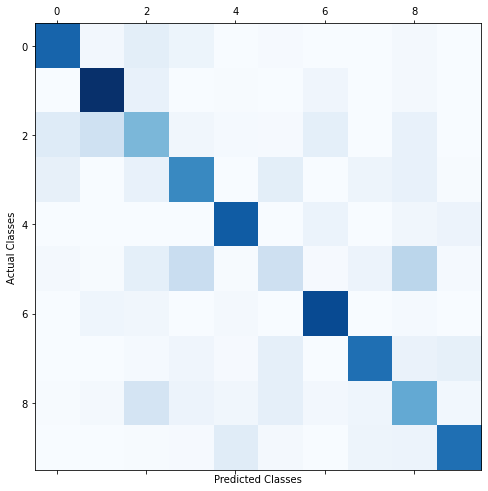

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx_2, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

The confusion matrix looks better than the one in Experiment 1, doesn' it? Let us normalize the confusion matrix to get the error rates.

### Confusion Matrix Error Rates

The confusion matrix does not look good. Only diagonal cells should be "lit up". Let us normalize the confusion matrix to get the error rates.

In [ ]:
row_sums_2 = conf_mx_2.sum(axis=1, keepdims=True)
norm_conf_mx_2 = conf_mx_2 / row_sums_2

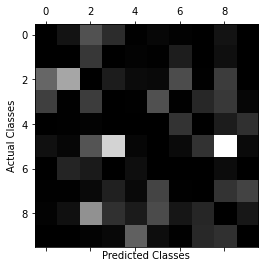

In [ ]:
np.fill_diagonal(norm_conf_mx_2, 0)
plt.matshow(norm_conf_mx_2, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

Looks like a lot of 5 digits were misclassified as 8's. Let's plot examples of 5's and 8's to try to determine what went wrong here.


In [ ]:
def plot_digits(instances, pos, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    pos.imshow(image, cmap = 'binary', **options)
    pos.axis("off")

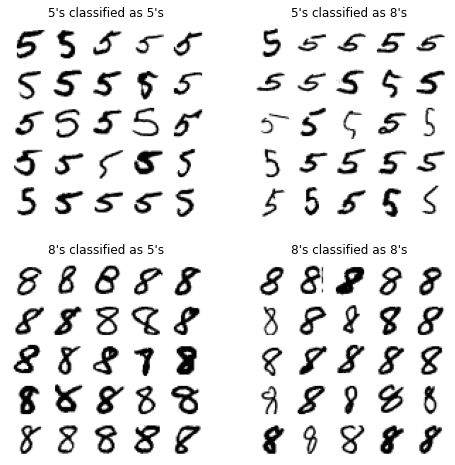

In [ ]:
cl_a, cl_b = 5, 8
X_aa = x_train[(y_train == cl_a) & (pred_classes_2 == cl_a)]
X_ab = x_train[(y_train == cl_a) & (pred_classes_2 == cl_b)]
X_ba = x_train[(y_train == cl_b) & (pred_classes_2 == cl_a)]
X_bb = x_train[(y_train == cl_b) & (pred_classes_2 == cl_b)]

plt.figure(figsize=(8,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

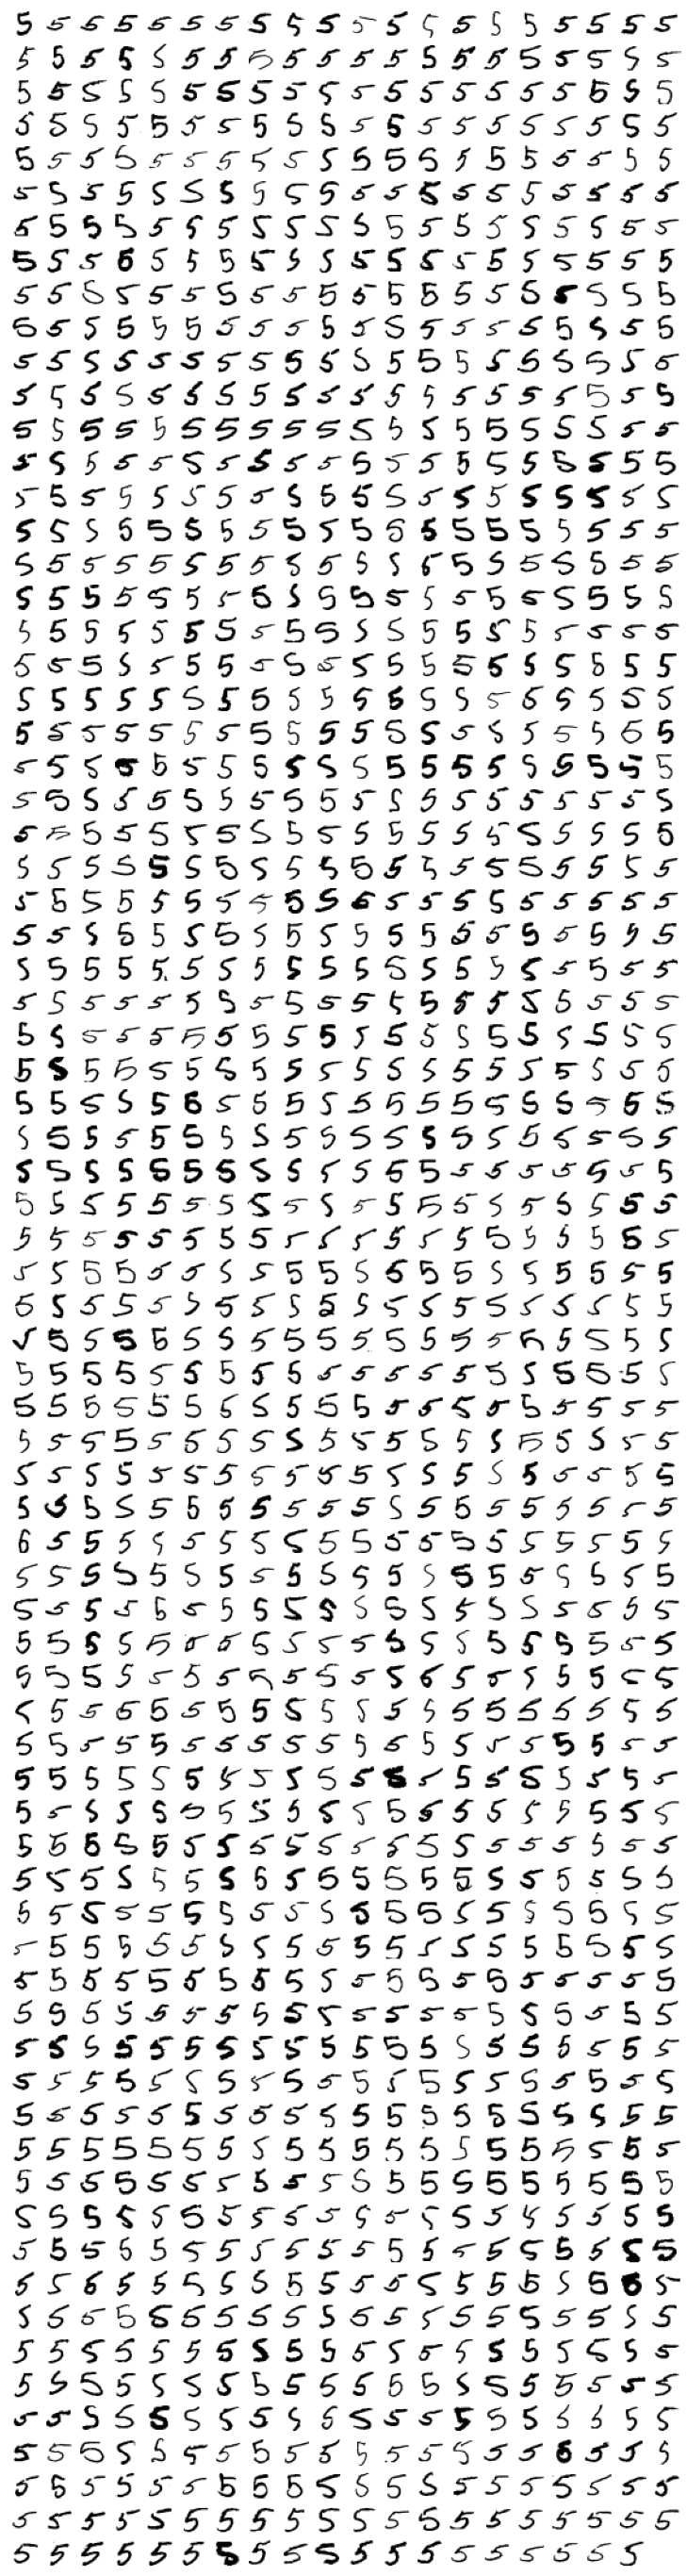

In [ ]:
# display all the 5's classified as 8's
num = X_ab.shape[0]
plt.figure(figsize=(50,50))
plot_digits(X_ab[:num],plt, images_per_row = 20)

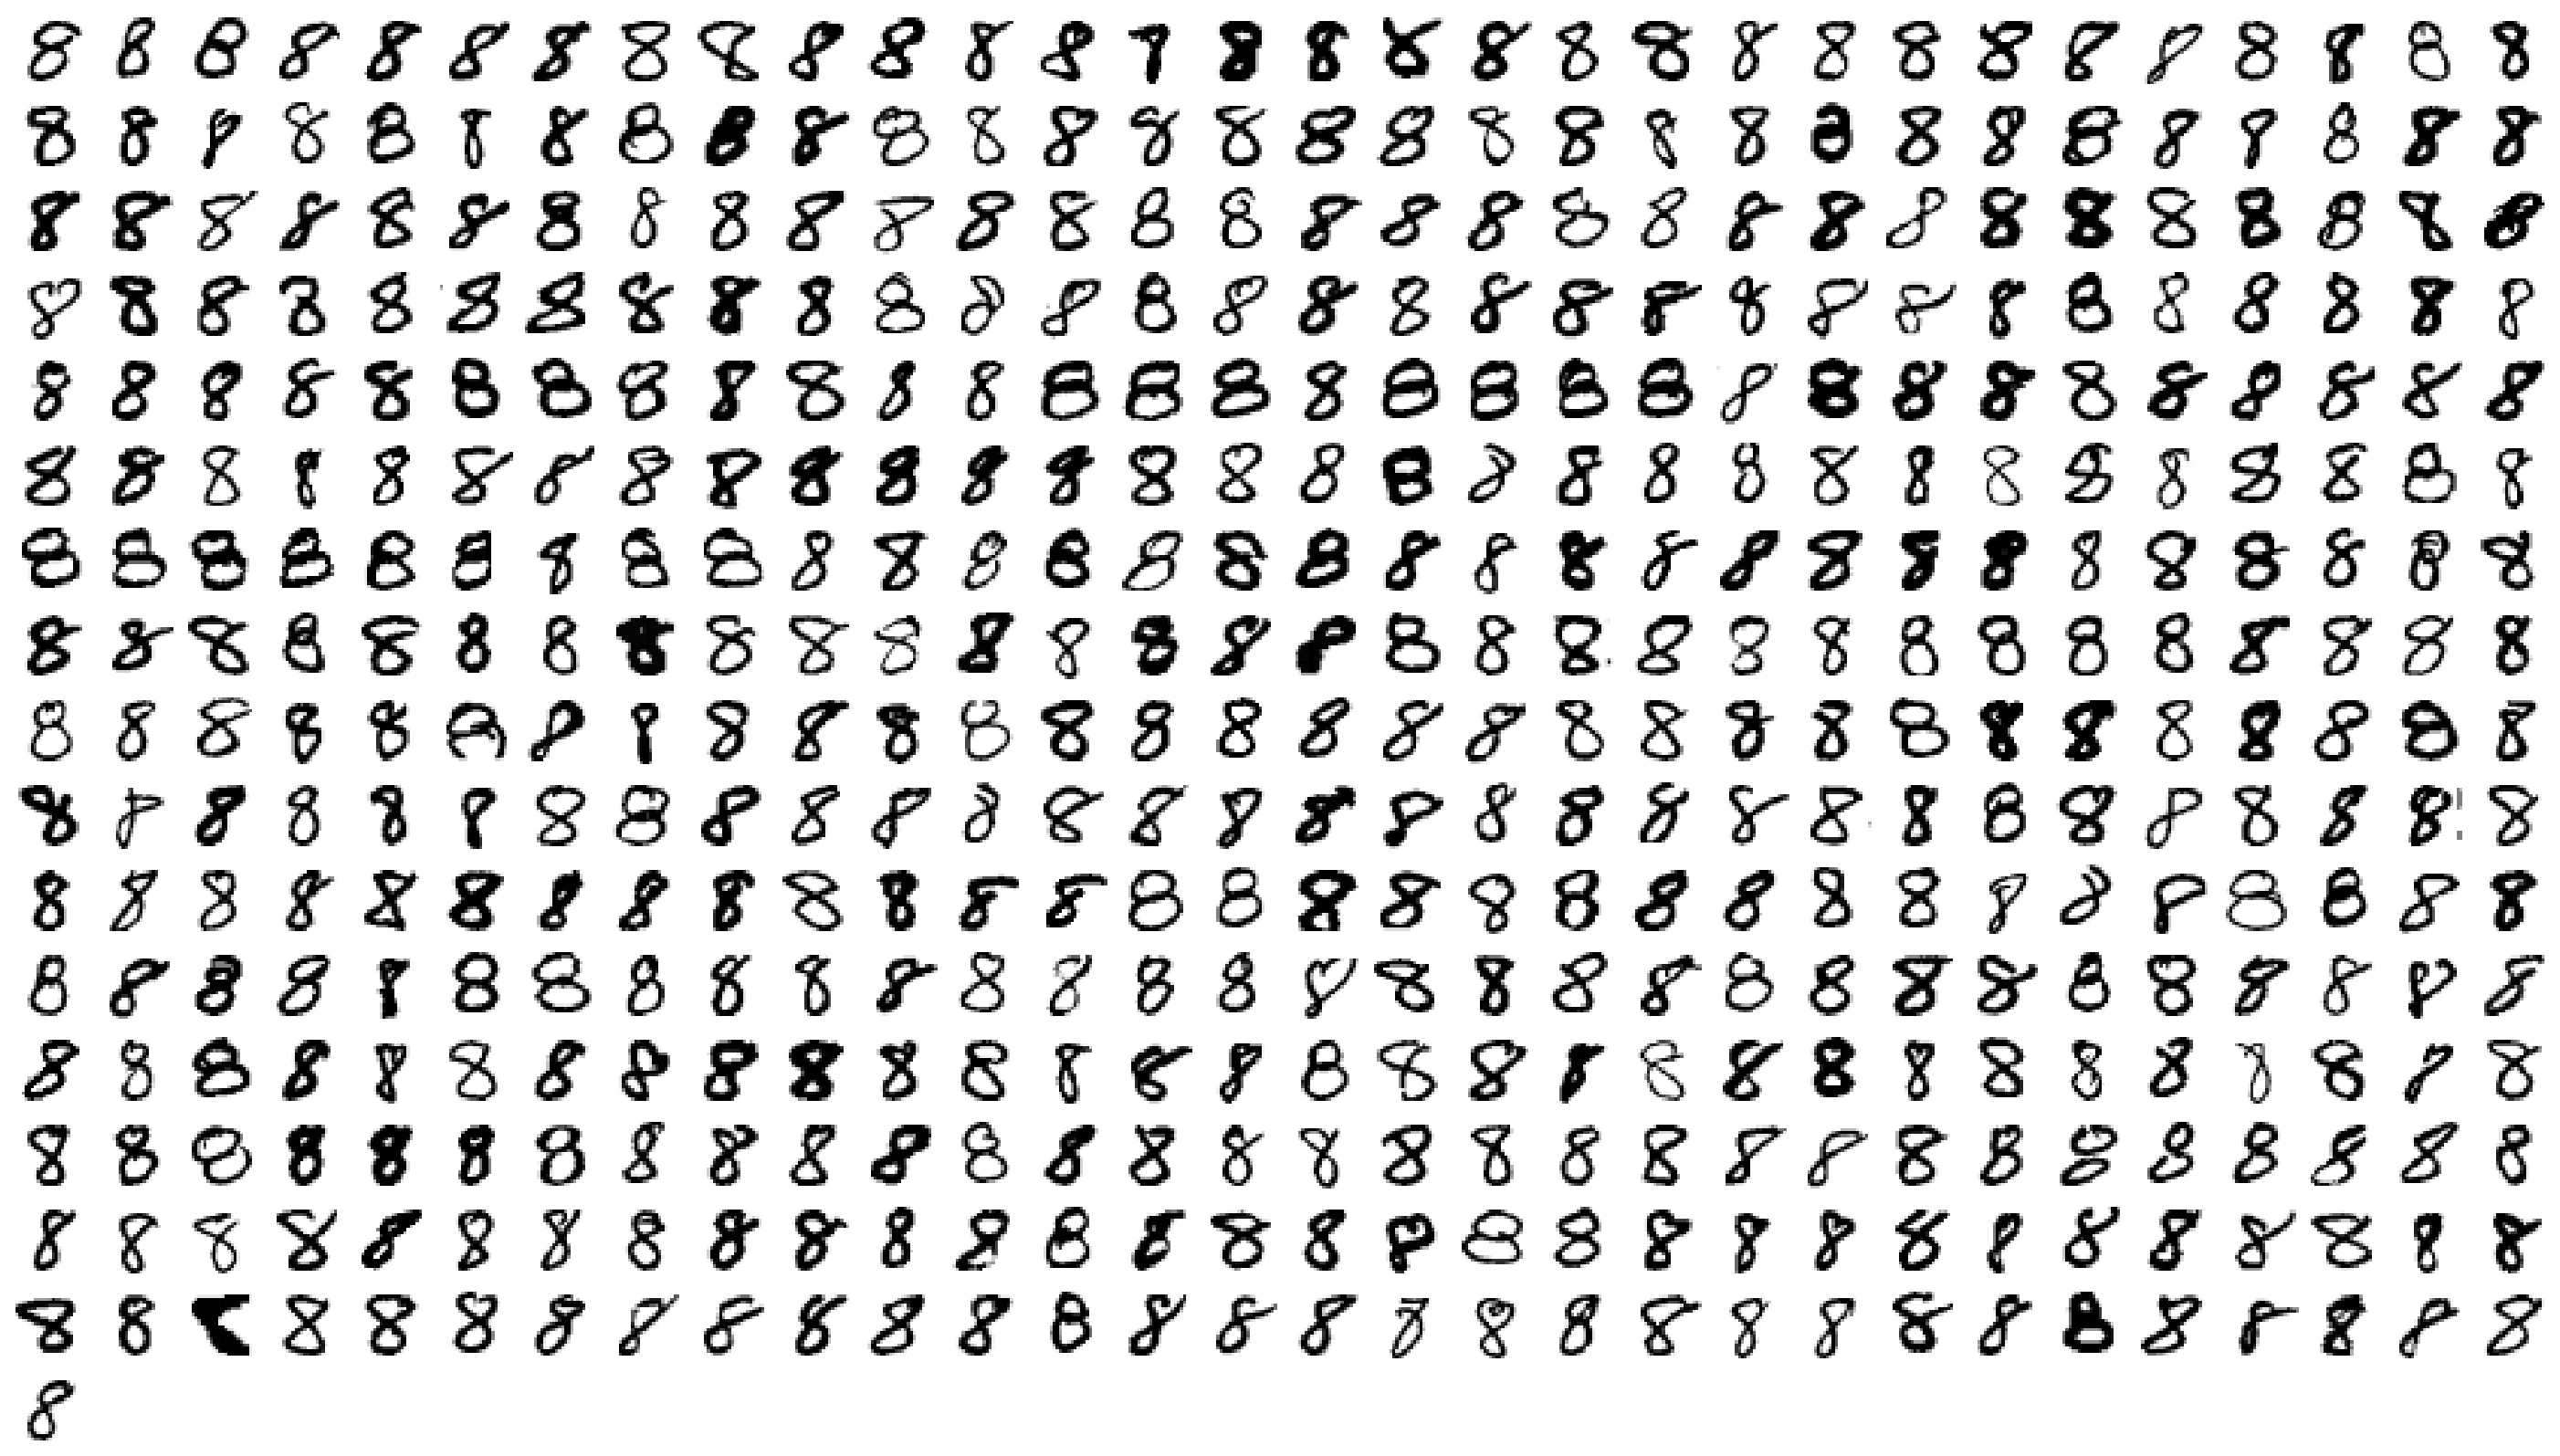

In [ ]:
# display all the 8's classified as 5's
num = X_ba.shape[0]
plt.figure(figsize=(50,50))
plot_digits(X_ba[:num],plt, images_per_row = 30)

## Analyzing the Activation Values of the Hidden Nodes


 ### Get the activation values of the hidden nodes
 
To get the activation values of the hidden nodes, we need to create a new model, `activation_model`, that takes the same input as our current model but outputs the activation value of the hidden layer, i.e. of the hidden node. Then use the `predict` function to get the activation values.

 ### Create a dataframe with the activation values and the class labels

In [ ]:
# Extracts the outputs of the 2 layers:
layer_outputs_2 = [layer.output for layer in model_2.layers]

# Creates a model that will return these outputs, given the model input:
activation_model_2 = Model(inputs=model_2.input, outputs=layer_outputs_2)

print(f"There are {len(layer_outputs_2)} layers")
layer_outputs_1 # description of the layers

There are 2 layers


[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'output_layer')>]

In [ ]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations_2 = activation_model_2.predict(x_train)
hidden_layer_activation_2 = activations_2[0]
output_layer_activations_2 = activations_2[1]
hidden_layer_activation_2.shape   #  each of the 1 hidden nodes has one activation value per training image

(55000, 2)

In [ ]:
output_layer_activations_2.shape

(55000, 10)

In [ ]:
hidden_node1_activation_2 = hidden_layer_activation_2[:,0] # get activation values of the first hidden node
hidden_node2_activation_2 = hidden_layer_activation_2[:,1] # get activation values of the second hidden node

print(f"The maximum activation value of the first hidden node is {hidden_node1_activation_2.max()}")
print(f"The maximum activation value of the second hidden node is {hidden_node2_activation_2.max()}")

The maximum activation value of the first hidden node is 53.447662353515625
The maximum activation value of the second hidden node is 26.17731285095215


In [ ]:
#Get the dataframe of all the node values
activation_df_2 = pd.DataFrame({'act_value_h1':hidden_node1_activation_2,
                                'act_value_h2':hidden_node2_activation_2,
                                'pred_class':pred_classes_2})

activation_df_2.head(5).round(3)

act_value_h1  act_value_h2  pred_class
0        19.236        10.449           7
1         6.973         7.979           3
2        10.513         2.247           9
3         0.000         0.413           6
4         0.000         3.551           1

In [ ]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation_2 = activations_2[1]
print(f"The output node has shape {ouput_layer_activation_2.shape}")
print(f"The output for the first image are {ouput_layer_activation_2[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation_2[0].sum()}")

The output node has shape (55000, 10)
The output for the first image are [0.    0.    0.    0.034 0.    0.043 0.    0.901 0.003 0.019]
The sum of the probabilities is (approximately) 1.0


 ### Visualize the Hidden Node 1 activation values with boxplots

We combine the activation values of the first hidden node with the corresponding predicted classes into a DataFrame. We use both `matplotlib` and `seaborn` to create boxplots from the DataFrame.

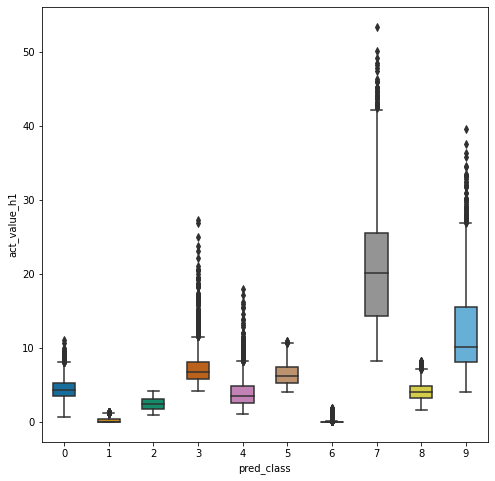

In [ ]:
# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
plt.figure(figsize=(8, 8))
bplot_2_1 = sns.boxplot(y='act_value_h1', x='pred_class', 
                 data=activation_df_2[['act_value_h1','pred_class']], 
                 width=0.5,
                 palette="colorblind")

In [ ]:
# displaying the range of activation values for each class labels
activation_df_2.groupby("pred_class")["act_value_h1"].apply(lambda x: [round(min(x.tolist()),2),
 round(max(x.tolist()),2)]).reset_index().rename(columns={"act_value_h1": "range_of_act_values"})

pred_class range_of_act_values
0           0        [0.74, 11.1]
1           1          [0.0, 1.4]
2           2         [1.0, 4.26]
3           3       [4.25, 27.34]
4           4       [1.15, 18.03]
5           5       [4.06, 11.02]
6           6         [0.0, 1.88]
7           7       [8.32, 53.45]
8           8        [1.65, 8.26]
9           9       [4.13, 39.68]

In [ ]:
# displaying the mean of activation values for each class labels
activation_df_2.groupby("pred_class")["act_value_h1"].mean().reset_index()

pred_class  act_value_h1
0           0      4.458227
1           1      0.261315
2           2      2.455921
3           3      7.196929
4           4      3.968326
5           5      6.496550
6           6      0.194530
7           7     20.593939
8           8      4.148538
9           9     12.055121

 ### Visualize the Hidden Node 2 activation values with boxplots

We combine the activation values of the second hidden node with the corresponding predicted classes into a DataFrame. We use both `matplotlib` and `seaborn` to create boxplots from the DataFrame.

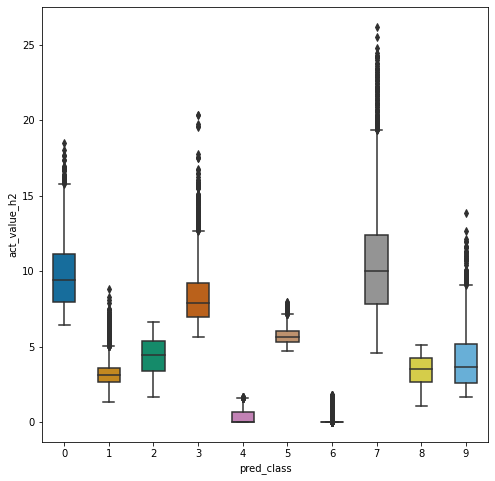

In [ ]:
# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
plt.figure(figsize=(8, 8))
bplot_2_1 = sns.boxplot(y='act_value_h2', x='pred_class', 
                 data=activation_df_2[['act_value_h2','pred_class']], 
                 width=0.5,
                 palette="colorblind")

In [ ]:
# displaying the range of activation values for each class labels
activation_df_2.groupby("pred_class")["act_value_h2"].apply(lambda x: [round(min(x.tolist()),2),
 round(max(x.tolist()),2)]).reset_index().rename(columns={"act_value_h2": "range_of_act_values"})

pred_class range_of_act_values
0           0        [6.43, 18.5]
1           1         [1.32, 8.8]
2           2        [1.65, 6.63]
3           3       [5.64, 20.35]
4           4         [0.0, 1.64]
5           5        [4.72, 7.96]
6           6          [0.0, 1.8]
7           7       [4.57, 26.18]
8           8        [1.04, 5.09]
9           9       [1.64, 13.84]

In [ ]:
# displaying the mean of activation values for each class labels
activation_df_2.groupby("pred_class")["act_value_h2"].mean().reset_index()

pred_class  act_value_h2
0           0      9.712963
1           1      3.176540
2           2      4.363178
3           3      8.327378
4           4      0.340764
5           5      5.723468
6           6      0.201947
7           7     10.437527
8           8      3.414582
9           9      4.080536

### Creating the Scatterplots

We combine the activation values of the two hidden nodes together with the corresponding predicted classes into a DataFrame. We use both `matplotlib` and `seaborn` to create boxplots from the DataFrame.

In [ ]:
scatterPlot_df_2 =  pd.DataFrame({'activation_value_h1':hidden_node1_activation_2,
                                'activation_value_h2':hidden_node2_activation_2,
                                'pred_class':pred_classes_2})
scatterPlot_df_2.head()

activation_value_h1  activation_value_h2  pred_class
0            19.236197            10.449429           7
1             6.972779             7.978653           3
2            10.512753             2.246571           9
3             0.000000             0.412956           6
4             0.000000             3.550911           1

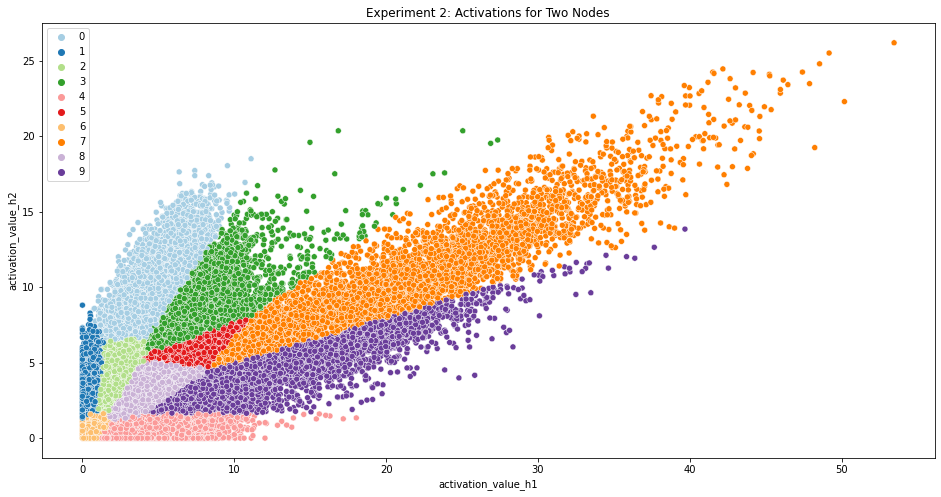

In [ ]:
plt.figure(figsize=(16, 8))
color = sns.color_palette("Paired", 10)
sns.scatterplot(x="activation_value_h1", y="activation_value_h2", hue="pred_class",  palette=color, data = scatterPlot_df_2, legend="full")
plt.legend(loc='upper left')
plt.title('Experiment 2: Activations for Two Nodes')
plt.savefig('Experiment_2');

# **EXPERIMENT 3:** 



You can explore with more hidden nodes. Then end up with 1 ‘final’ model. Say the ‘best’ model.



In [ ]:
# Original Code (No longer used)

# def exp_3(num_units):
#   model = Sequential([
#     Dense(input_shape=[784], units = num_units, activation = tf.nn.relu),
#     Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])
#   model.compile(optimizer='rmsprop',           
#                 loss = 'categorical_crossentropy',
#                 metrics=['accuracy'])
#   start = time()
#   history = model.fit(
#     x_train_norm
#     ,y_train_encoded
#     ,epochs = 200
#     ,validation_split=0.0833 
#     ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)]
#     ,verbose=0)
#   model_time = time() - start
#   loss, accuracy = model.evaluate(x_test_norm, y_test_encoded, verbose=0)
#   preds = model.predict(x_test_norm)
#   return model, history, loss, accuracy, preds, model_time

# nodes_all = []

# test_units = np.array(range(0,11))
# test_units
# for i in test_units:
#   nodes_all.append(i)

# model_all = []
# history_all = [] 
# loss_all = []
# accuracy_all = []
# preds_all = []
# time_all = []

# for unit in test_units:
#   model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = exp_3(unit)
#   model_all.append(model_temp)
#   history_all.append(history_temp)
#   loss_all.append(loss_temp)
#   accuracy_all.append(accuracy_temp)
#   preds_all.append(preds_temp)
#   time_all.append(time_temp)

# test_units = np.array(range(11,129))
# test_units

# for i in test_units:
#   nodes_all.append(i)

# for unit in test_units:
#   model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = exp_3(unit)
#   model_all.append(model_temp)
#   history_all.append(history_temp)
#   loss_all.append(loss_temp)
#   accuracy_all.append(accuracy_temp)
#   preds_all.append(preds_temp)
#   time_all.append(time_temp)

# test_units = np.array(range(12,41))
# test_units

# test_units_sq = test_units*test_units
# test_units_sq

# for i in test_units_sq:
#   nodes_all.append(i)

# for unit in test_units_sq:
#   model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = exp_3(unit)
#   model_all.append(model_temp)
#   history_all.append(history_temp)
#   loss_all.append(loss_temp)
#   accuracy_all.append(accuracy_temp)
#   preds_all.append(preds_temp)
#   time_all.append(time_temp)
#   print(accuracy_temp)

In [ ]:
# Updated Code 2021-07-08

def run_model_exp_3(num_nodes):
  model = Sequential([
    Dense(input_shape=[784], units = num_nodes, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])
  model.compile(optimizer='rmsprop',           
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  start = time()
  history = model.fit(
    x_train
    ,y_train
    ,epochs = 30
    ,validation_data=(x_val, y_val)
    ,verbose=0
    )
  model_time = time() - start
  loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
  preds = model.predict(x_test)
  return model, history, loss, accuracy, preds, model_time

For Experiment 3, I decide to test my model on 2**n Nodes, with n ranging from 0 to 10. This will produce models with the following range of `Nodes = [1,2,4,8,16,32,64,128,256,512,1024]`

In [ ]:
nodes_exp_3 = []

nodes_exp_3 = np.array(2**np.array(range(0,11)))
nodes_exp_3

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

In [ ]:
model_all = []
history_all = [] 
loss_all = []
accuracy_all = []
preds_all = []
time_all = []

for node in nodes_exp_3:
  model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = run_model_exp_3(node)
  model_all.append(model_temp)
  history_all.append(history_temp)
  loss_all.append(loss_temp)
  accuracy_all.append(accuracy_temp)
  preds_all.append(preds_temp)
  time_all.append(time_temp)
  print(f'Test set accuracy for {node} Node: {accuracy_temp * 100}')

Test set accuracy for 1 Node: 36.05000078678131
Test set accuracy for 2 Node: 69.13999915122986
Test set accuracy for 4 Node: 87.5
Test set accuracy for 8 Node: 91.75000190734863
Test set accuracy for 16 Node: 95.23000121116638
Test set accuracy for 32 Node: 96.64999842643738
Test set accuracy for 64 Node: 97.28000164031982
Test set accuracy for 128 Node: 97.75000214576721
Test set accuracy for 256 Node: 97.99000024795532
Test set accuracy for 512 Node: 98.00999760627747
Test set accuracy for 1024 Node: 98.11999797821045


In [ ]:
df_accuracy_all = pd.DataFrame(accuracy_all, columns=['Accuracy'])

In [ ]:
df_accuracy_all['Log2_Nodes'] = np.log2(nodes_exp_3)

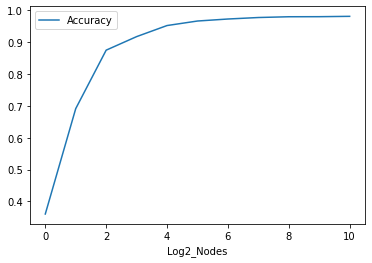

In [ ]:
df_accuracy_all.plot(kind='line', x='Log2_Nodes', y='Accuracy')

In [ ]:
df_time_all = pd.DataFrame(time_all, columns=['Execution Time'])

In [ ]:
df_time_all['Log2_Nodes'] = np.log2(nodes_exp_3)

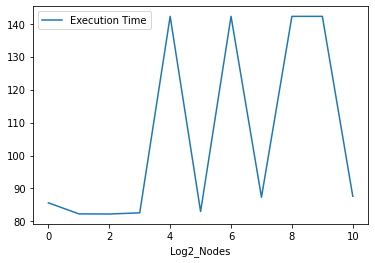

In [ ]:
df_time_all.plot(kind='line', x='Log2_Nodes', y='Execution Time')

In [ ]:
df_time_all

Execution Time  Log2_Nodes
0        85.630545         0.0
1        82.279302         1.0
2        82.234545         2.0
3        82.592873         3.0
4       142.243719         4.0
5        82.984437         5.0
6       142.256496         6.0
7        87.329726         7.0
8       142.245923         8.0
9       142.248782         9.0
10       87.624012        10.0

In [ ]:
model_3 = model_all[7]
history_3 = history_all[7]
losses_3 = history_all[7].history['loss']
accs_3 = history_all[7].history['accuracy']
val_losses_3 = history_all[7].history['val_loss']
val_accs_3 = history_all[7].history['val_accuracy']
epochs_3 = len(losses_3)
time_3 = time_all[7]
preds_3 = preds_all[7]

### Specify the network architecture

In [ ]:
model_all[7].summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


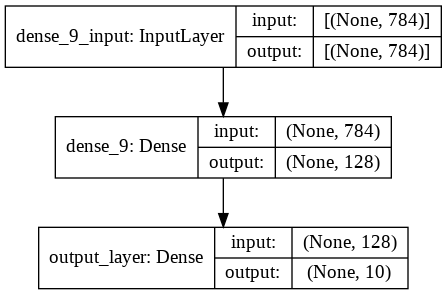

In [ ]:
keras.utils.plot_model(model_3, "mnist_model.png", show_shapes=True) 

## Reviewing Performance

In [ ]:
history_dict_3 = history_3.history
history_dict_3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot performance metrics 

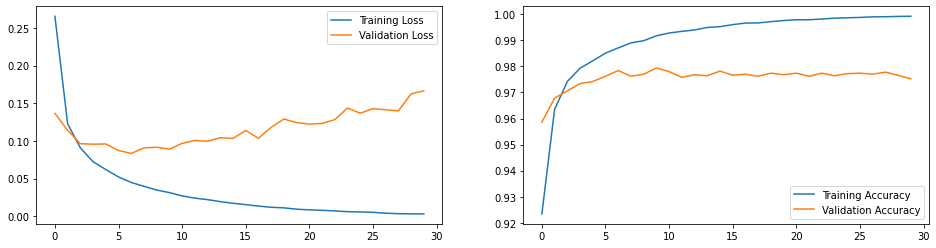

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_3, accs_3], [val_losses_3, val_accs_3], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_3), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_3), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Create the confusion matrix

In [ ]:
# Get the predicted classes:
pred_classes_3 = np.argmax(model_3.predict(x_train), axis=-1)
pred_classes_3

#Alt Code (Deprecated)
#pred_classes_2 = model_2.predict_classes(x_test)
#pred_classes_2

array([7, 3, 4, ..., 5, 6, 8])

In [ ]:
#conf_mx_2 = tf.math.confusion_matrix(y_test, pred_classes_2)
conf_mx_3 = confusion_matrix(y_train, pred_classes_3)
conf_mx_3;

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df_3 = pd.DataFrame(preds_3[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df_3.style.format("{:.2%}").background_gradient(cmap=cm)

### Visualize the confusion matrix

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Note that the rows represent actual classes while the columns represent predicted classes.

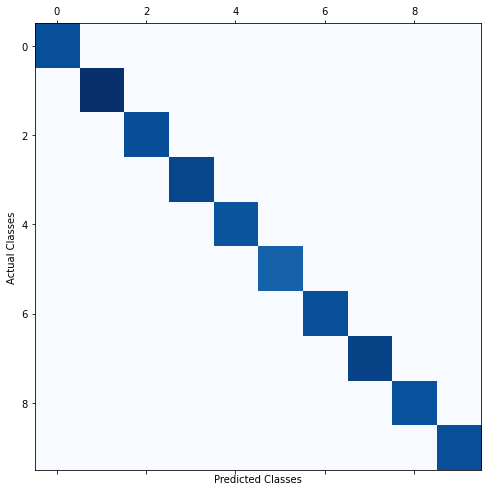

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx_3, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Confusion Matrix Error Rates

In [ ]:
row_sums_3 = conf_mx_3.sum(axis=1, keepdims=True)
norm_conf_mx_3 = conf_mx_3 / row_sums_3

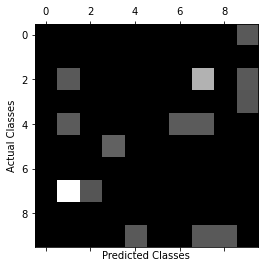

In [ ]:
np.fill_diagonal(norm_conf_mx_3, 0)
plt.matshow(norm_conf_mx_3, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

In [ ]:
#losses_3 = history_all[7].history['loss']
#accs_3 = history_all[7].history['accuracy']
#val_losses_3 = history_all[7].history['val_loss']
#val_accs_3 = history_all[7].history['val_accuracy']
#epochs_3 = len(losses_3)
#time_3 = time_all[7]

final_train_accs_3 = []
final_train_losses_3 = []
final_val_accs_3 = []
final_val_losses_3 = []
final_test_accs_3 = []
final_test_losses_3 = []
epochs_3 = []

for i in range(len(history_all)):
  temp_train_acc = history_all[i].history['accuracy'][-1]
  temp_train_loss = history_all[i].history['loss'][-1]
  temp_val_acc = history_all[i].history['val_accuracy'][-1]
  temp_val_loss = history_all[i].history['val_loss'][-1]
  temp_epoch = len(history_all[i].history['loss'])
  temp_test_acc = accuracy_all[i]
  temp_test_loss = loss_all[i]
  final_train_accs_3.append(temp_train_acc)
  final_train_losses_3.append(temp_train_loss)
  final_val_accs_3.append(temp_val_acc)
  final_val_losses_3.append(temp_val_loss)
  final_test_accs_3.append(temp_test_acc)
  final_test_losses_3.append(temp_test_loss)
  epochs_3.append(temp_epoch)


In [ ]:
final_df_3 = pd.DataFrame({'Nodes' : nodes_exp_3,
                           'Final Train Accuracy' : final_train_accs_3,
                           'Final Train Loss' : final_train_losses_3,
                           'Final Val Accuracy' : final_val_accs_3 ,
                           'Final Val Loss' : final_val_losses_3,
                           'Test Accuracy' : final_test_accs_3,
                           'Test Loss' : final_test_losses_3,
                           'Model Time' : time_all}, 
                           columns=['Nodes', 'Final Train Accuracy',
                                    'Final Train Loss', 'Final Val Accuracy',
                                    'Final Val Loss', 'Test Accuracy',
                                    'Test Loss', 'Model Time'],
                           )

In [ ]:
final_df_3

Nodes  Final Train Accuracy  ...  Test Loss  Model Time
0       1              0.362236  ...   1.608255   85.630545
1       2              0.694582  ...   1.005878   82.279302
2       4              0.877255  ...   0.467316   82.234545
3       8              0.925782  ...   0.320834   82.592873
4      16              0.965018  ...   0.209642  142.243719
5      32              0.987055  ...   0.166277   82.984437
6      64              0.996091  ...   0.161146  142.256496
7     128              0.999236  ...   0.161160   87.329726
8     256              0.999745  ...   0.160438  142.245923
9     512              0.999891  ...   0.189050  142.248782
10   1024              0.999836  ...   0.209649   87.624012

[11 rows x 8 columns]

## **EXPERIMENT 4:**


Use PCA decomposition to reduce the number of dimensions of our training set of 28x28 dimensional MNIST images from 784 to 154 (with 95% of training images variance lying along these components). We also reduce the number of dimensions of 'best' model from `Experiment 3` to 154 inputs nodes and train it on the new lower dimensional data. We then compare the performance of Experiments 3 and 4.



## 9. PCA Feature Reduction / Model Optimization 

<div class="alert alert-block alert-info">
    <b>Correlation matrix that measures the linear relationships</b><br> 
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
    </div>

### Use PCA decomposition to reduce the number of features from 784 features to 154 features 

In [ ]:
# Separating out the features
# features = [*pixel_data][1:] # ['pix_val_0', 'pix_val_1',...]
# x = pixel_df.loc[:, features].values 

pca = PCA(n_components=154)
pca.fit(x_train)
pca_x_train_4 = pca.transform(x_train)
pca_x_test_4 = pca.transform(x_test)
pca_x_val_4 = pca.transform(x_val)

In [ ]:
pca_x_train_4.shape

(55000, 154)

In [ ]:
pca_x_test_4.shape

(10000, 154)

In [ ]:
pca_x_val_4.shape

(5000, 154)

In [ ]:
pca.explained_variance_ratio_

array([0.097, 0.071, 0.062, 0.054, 0.049, 0.043, 0.033, 0.029, 0.028,
       0.024, 0.021, 0.02 , 0.017, 0.017, 0.016, 0.015, 0.013, 0.013,
       0.012, 0.012, 0.011, 0.01 , 0.01 , 0.009, 0.009, 0.008, 0.008,
       0.008, 0.007, 0.007, 0.007, 0.007, 0.006, 0.006, 0.006, 0.005,
       0.005, 0.005, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004,
       0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001,

## Creating the NN Model

### Specify the network architecture

### Build the NN model

In [ ]:
model_4 = Sequential([
    Dense(input_shape=[154], units = 128, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [ ]:
model_4.summary()

Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 128)               19840     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 21,130
Trainable params: 21,130
Non-trainable params: 0
_________________________________________________________________


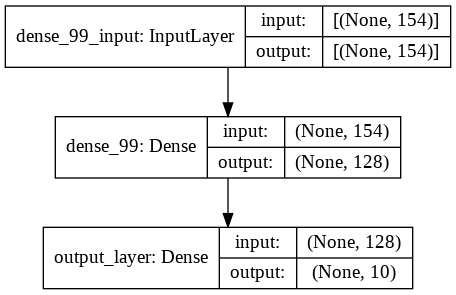

In [ ]:
keras.utils.plot_model(model_4, "mnist_model.png", show_shapes=True) 

### Compile the DNN model

In [ ]:
model_4.compile(optimizer='rmsprop',           
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

### Train the DNN model

In [ ]:
start = time()
history_4 = model_4.fit(
    pca_x_train_4
    ,y_train
    ,epochs = 30
    ,validation_data=(pca_x_val_4, y_val)
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)]
    #,validation_split=0.0833 
) 
model_time_4 = time() - start

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3103 - accuracy: 0.9146 - val_loss: 0.1430 - val_accuracy: 0.9610
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1214 - accuracy: 0.9651 - val_loss: 0.1048 - val_accuracy: 0.9726
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0834 - accuracy: 0.9756 - val_loss: 0.0889 - val_accuracy: 0.9744
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0616 - accuracy: 0.9827 - val_loss: 0.0837 - val_accuracy: 0.9774
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0476 - accuracy: 0.9865 - val_loss: 0.0830 - val_accuracy: 0.9770
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0369 - accuracy: 0.9897 - val_loss: 0.0789 - val_accuracy: 0.9790
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0293 - accuracy: 0.9921 - val_loss: 0.0791 - val_accuracy:

In [ ]:
model_time_4

44.30426549911499

### Evaluate the DNN model

In [ ]:
loss_4, accuracy_4 = model_4.evaluate(pca_x_test_4, y_test)
print('test set accuracy: ', accuracy_4 * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1046 - accuracy: 0.9756
test set accuracy:  97.5600004196167


## 6. Making Predictions

In [ ]:
preds_4 = model_4.predict(pca_x_test_4)
print('shape of preds: ', preds_4.shape)

shape of preds:  (10000, 10)


## 7. Reviewing Performance

In [ ]:
history_dict_4 = history_4.history
history_dict_4.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot performance metrics 

In [ ]:
losses_4 = history_4.history['loss']
accs_4 = history_4.history['accuracy']
val_losses_4 = history_4.history['val_loss']
val_accs_4 = history_4.history['val_accuracy']
epochs_4 = len(losses_4)

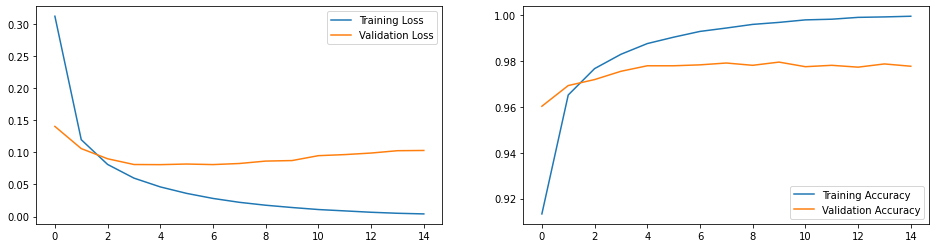

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_4, accs_4], [val_losses_4, val_accs_4], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_4), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_4), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Create the confusion matrix

In [ ]:
# Get the predicted classes:
pred_classes_4 = np.argmax(model_4.predict(pca_x_test_4), axis=-1)
pred_classes_4

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
conf_mx_4 = tf.math.confusion_matrix(y_test, pred_classes_4)
conf_mx_4;

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df_4 = pd.DataFrame(preds_4[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df_4.style.format("{:.2%}").background_gradient(cmap=cm)

### Visualize the confusion matrix

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Note that the rows represent actual classes while the columns represent predicted classes.

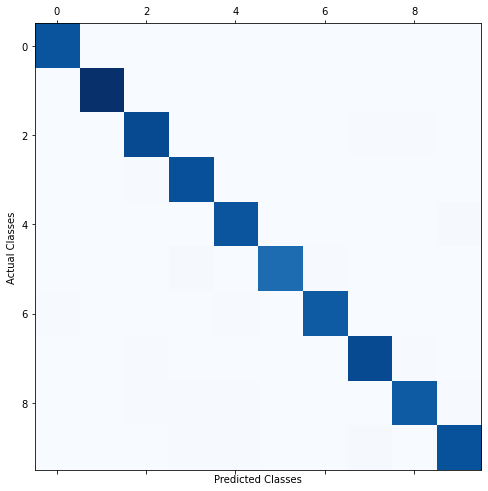

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx_4, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

 ### Get the activation values of the hidden nodes
 
To get the activation values of the hidden nodes, we need to create a new model, `activation_model`, that takes the same input as our current model but outputs the activation value of the hidden layer, i.e. of the hidden node. Then use the `predict` function to get the activation values.

In [ ]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model_4.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = Model(inputs=model_4.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 2 layers


In [ ]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(pca_x_train_4)
hidden_layer_activation = activations[0]
output_layer_activations = activations[1]
hidden_layer_activation.shape   #  each of the 128 hidden nodes has one activation value per training image

(55000, 128)

In [ ]:
output_layer_activations.shape

(55000, 10)

In [ ]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 12.325516700744629


In [ ]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (55000, 10)
The output for the first image are [0.    0.    0.    0.003 0.    0.    0.    0.997 0.    0.   ]
The sum of the probabilities is (approximately) 1.0


 ### Create a dataframe with the activation values and the class labels

In [ ]:
#Get the dataframe of all the node values
activation_data = {'actual_class':y_train}
for k in range(0,128): 
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]

activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

0      1      2      3   ...     11     12     13     14
actual_class  7.000  3.000  4.000  6.000  ...  3.000  1.000  2.000  7.000
act_val_0     0.439  1.277  1.689  0.000  ...  3.624  0.000  0.000  0.923
act_val_1     2.690  0.930  0.000  0.000  ...  0.418  0.000  1.128  0.000
act_val_2     1.662  0.000  2.470  1.897  ...  0.254  0.000  0.000  0.000
act_val_3     0.000  2.042  0.000  0.000  ...  1.246  0.728  2.736  0.000
...             ...    ...    ...    ...  ...    ...    ...    ...    ...
act_val_123   1.818  0.000  0.000  2.214  ...  0.000  1.188  0.593  0.738
act_val_124   0.575  0.000  0.673  0.000  ...  0.000  0.000  0.136  0.000
act_val_125   0.000  0.721  0.658  0.000  ...  1.272  1.361  0.000  0.000
act_val_126   0.000  2.822  0.000  0.214  ...  0.645  1.228  0.000  0.513
act_val_127   2.307  0.000  1.107  0.374  ...  0.000  0.685  1.520  0.000

[129 rows x 15 columns]

### Use t-Distributed Stochastic Neighbor Embedding (**t-SNE**)  to reduce the (activation) features from 128 (= num of hidden nodes) to 2

`t-Distributed Stochastic Neighbor Embedding` (**t-SNE**) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. This time we only use the first 10,000 training images (N=10000) since the technique is computationally expensive.

See http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

<div class="alert alert-block alert-info">
    <b>Correlation matrix that measures the linear relationships</b><br> 
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
    </div>

In [ ]:
activation_df.shape

(55000, 129)

In [ ]:
N=55000
activation_df_subset = activation_df.iloc[:N].copy()
activation_df_subset.shape

(55000, 129)

In [ ]:
features = [*activation_data][1:] # ['act_val_0', 'act_val_1',...]
data_subset = activation_df_subset[features].values
data_subset.shape

(55000, 128)

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 55000 samples in 3.347s...
[t-SNE] Computed neighbors for 55000 samples in 950.587s...
[t-SNE] Computed conditional probabilities for sample 1000 / 55000
[t-SNE] Computed conditional probabilities for sample 2000 / 55000
[t-SNE] Computed conditional probabilities for sample 3000 / 55000
[t-SNE] Computed conditional probabilities for sample 4000 / 55000
[t-SNE] Computed conditional probabilities for sample 5000 / 55000
[t-SNE] Computed conditional probabilities for sample 6000 / 55000
[t-SNE] Computed conditional probabilities for sample 7000 / 55000
[t-SNE] Computed conditional probabilities for sample 8000 / 55000
[t-SNE] Computed conditional probabilities for sample 9000 / 55000
[t-SNE] Computed conditional probabilities for sample 10000 / 55000
[t-SNE] Computed conditional probabilities for sample 11000 / 55000
[t-SNE] Computed conditional probabilities for sample 12000 / 55000
[t-SNE] Computed conditional probabilities for 

In [ ]:
tsne_results = (tsne_results - tsne_results.min()) / (tsne_results.max() - tsne_results.min())

In [ ]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

In [ ]:
x_train = x_train[5000:]
x_train.shape

(55000, 28, 28)

In [ ]:
y_train = y_train[5000:]
y_train.shape

(55000,)

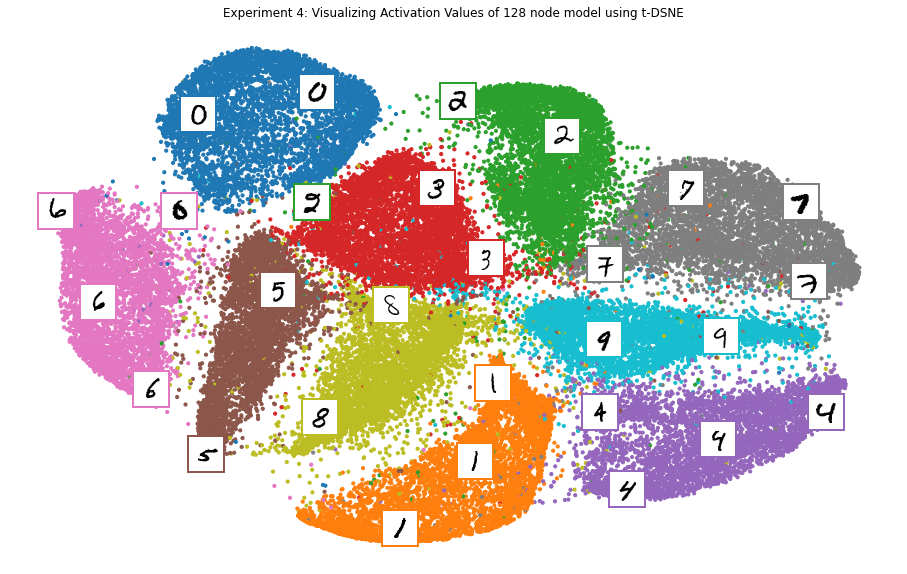

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
# plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1], c=y_train, s=10, cmap=cmap)

image_positions = np.array([[1., 1.]])
for index, position in enumerate(tsne_results):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(x_train[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_train[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.title('Experiment 4: Visualizing Activation Values of 128 node model using t-DSNE')
plt.savefig('Experiment_4')
plt.show()

# **EXPERIMENT 5:**


## Load MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

## Pre-Process Data

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in the [0, 1] interval.

Our training images are stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval.

We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

### Apply one-hot encoding on the labels (Optional)

In Experiment 1, we use the original y-outputs. Since we will be using `sparse_categorical_crossentropy` as the loss function we do not need to use `to_categorical` to convert the class vector of labels to binary matrix representation.

In [ ]:
#y_train_encoded = to_categorical(y_train)
#y_test_encoded = to_categorical(y_test)

### Reshape the images to 1D arrays

In [ ]:
# Reshape the images:
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

In [ ]:
x_train.shape

(60000, 784)

### Rescale the elements of the reshaped images

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Validating our approach

We set apart 5,000 samples of our training data to use as a validation set.

In [ ]:
x_val, x_train = x_train[:5000], x_train[5000:] 
y_val, y_train = y_train[:5000], y_train[5000:]

## Reducing dimensionality of the data with Random Forests.

We create a Random Forrest Classifier (with the default 100 trees) and use it to find the relative importance of the 784 features (pixels) in the training set. We produce a heat map to visual the relative importance of the features (using code from Hands On Machine Learning by A. Geron). Finally, we select the 70 most important feature (pixels) from the training, validation and test images to test our 'best' model on.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

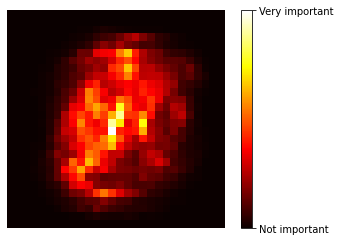

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

# plt.savefig("mnist_feature_importance_plot")
plt.show()

In [ ]:
# https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels
len(idx)

70

In [ ]:
# Create training, validation and test images using just the 70 pixel locations obtained above
train_images_sm = x_train[:,idx]
val_images_sm = x_val[:,idx]
test_images_sm = x_test[:,idx]
train_images_sm.shape, val_images_sm.shape, test_images_sm.shape # the reduced images have dimension 70

((55000, 70), (5000, 70), (10000, 70))

## Visualizing the 70 pixels

We convert the array of indexes to ordered pairs and plot them as red circles on the second training image. These are the feature we are training our neural network on.

In [ ]:
# to convert an index n, 0<= n < 784
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y

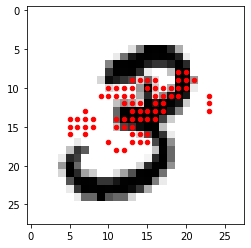

In [ ]:
plt.imshow(x_train[1].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

## Building, training and testing the model on the new data

We modify the model to take input with dimension (70,)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model_5 = Sequential()
model_5.add(layers.Dense(128, activation='relu', input_shape=(70,)))
model_5.add(layers.Dense(10, activation='softmax'))  

# For use with non-categorical labels
model_5.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
start = time()
history_5 = model.fit(train_images_sm, y_train, epochs=30,
                    validation_data=(val_images_sm, y_val),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)])
time_5 = time() - start

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1457 - accuracy: 0.9570 - val_loss: 0.2684 - val_accuracy: 0.9356
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1472 - accuracy: 0.9561 - val_loss: 0.2895 - val_accuracy: 0.9304
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1473 - accuracy: 0.9574 - val_loss: 0.2754 - val_accuracy: 0.9348
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1455 - accuracy: 0.9577 - val_loss: 0.2720 - val_accuracy: 0.9320
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1466 - accuracy: 0.9575 - val_loss: 0.2711 - val_accuracy: 0.9336
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1451 - accuracy: 0.9574 - val_loss: 0.2755 - val_accuracy: 0.9364
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1453 - accuracy: 0.9573 - val_loss: 0.2700 - val_accuracy:

In [ ]:
model_5.summary()

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 128)               9088      
_________________________________________________________________
dense_101 (Dense)            (None, 10)                1290      
Total params: 10,378
Trainable params: 10,378
Non-trainable params: 0
_________________________________________________________________


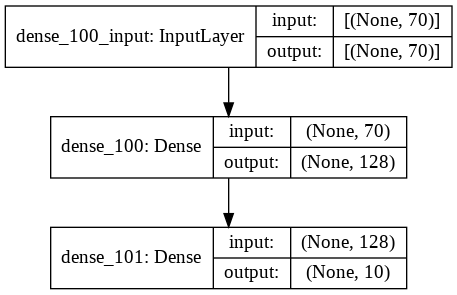

In [ ]:
keras.utils.plot_model(model_5, "mnist_model.png", show_shapes=True) 

In [ ]:
hist_dict_5 = history_5.history
hist_dict_5.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
print(f'''acc: {hist_dict_5['accuracy'][-1]:.4}, val acc: {hist_dict_5['val_accuracy'][-1]:.4},
loss: {hist_dict_5['loss'][-1]:.4}, val loss: {hist_dict_5['val_loss'][-1]:.4},
time: {time_5:.4}''')

acc: 0.958, val acc: 0.9338,
loss: 0.1442, val loss: 0.2793,
time: 40.49


## Testing the Model

Evaluate the model on the test dataset.

In [ ]:
test_loss_5, test_acc_5 = model.evaluate(test_images_sm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2805 - accuracy: 0.9303


In [ ]:
print(f'test acc: {test_acc_5}, test loss: {test_loss_5}')  # Note very good...

test acc: 0.9302999973297119, test loss: 0.2804792523384094


## Making Predictions

In [ ]:
preds_5 = model_5.predict(test_images_sm)
print('shape of preds: ', preds_5.shape)

shape of preds:  (10000, 10)


## Reviewing Performance

In [ ]:
losses_5 = history_5.history['loss']
accs_5 = history_5.history['accuracy']
val_losses_5 = history_5.history['val_loss']
val_accs_5 = history_5.history['val_accuracy']
epochs_5 = len(losses_5)

### Plot performance metrics 

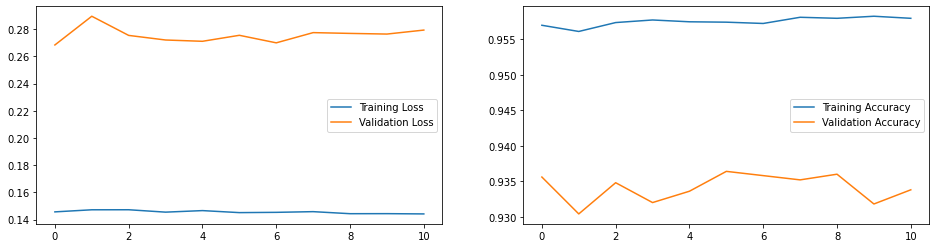

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_5, accs_5], [val_losses_5, val_accs_5], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_5), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_5), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Create the confusion matrix

In [ ]:
final_df_5 = pd.DataFrame({'Nodes' : 128,
                           'Final Train Accuracy' : hist_dict_5['accuracy'][-1],
                           'Final Train Loss' : hist_dict_5['loss'][-1],
                           'Final Val Accuracy' : hist_dict_5['val_accuracy'][-1],
                           'Final Val Loss' : hist_dict_5['val_loss'][-1],
                           'Test Accuracy' : test_acc_5,
                           'Test Loss' : test_loss_5, 
                           'Model Time' : time_5}, 
                           columns=['Nodes', 'Final Train Accuracy',
                                    'Final Train Loss', 'Final Val Accuracy',
                                    'Final Val Loss', 'Test Accuracy', 'Test Loss', 'Model Time'],
                           index=[0]
                           )

In [ ]:
final_df_5

Nodes  Final Train Accuracy  ...  Test Loss  Model Time
0    128              0.957982  ...   0.280479   40.489775

[1 rows x 8 columns]

In [ ]:
# Get the predicted classes:
pred_classes_5 = np.argmax(model.predict(train_images_sm), axis=-1)
pred_classes_5

#Alt Code (Deprecated)
#pred_classes_2 = model_2.predict_classes(x_test)
#pred_classes_2

array([7, 3, 9, ..., 5, 6, 8])

In [ ]:
#conf_mx_2 = tf.math.confusion_matrix(y_test, pred_classes_2)
conf_mx_5 = confusion_matrix(y_train, pred_classes_5)
conf_mx_5;

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df_5 = pd.DataFrame(preds_5[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df_5.style.format("{:.2%}").background_gradient(cmap=cm)

### Visualize the confusion matrix

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Note that the rows represent actual classes while the columns represent predicted classes.

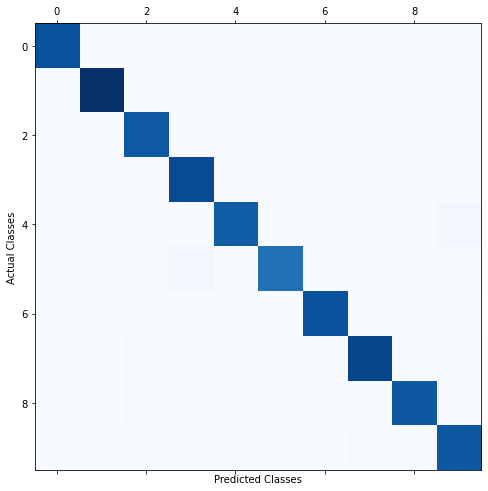

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx_5, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Confusion Matrix Error Rates

In [ ]:
row_sums_5 = conf_mx_5.sum(axis=1, keepdims=True)
norm_conf_mx_5 = conf_mx_5 / row_sums_5

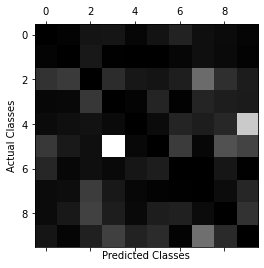

In [ ]:
np.fill_diagonal(norm_conf_mx_5, 0)
plt.matshow(norm_conf_mx_5, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **EXPERIMENT 6:** 



Explore a Adam Optimizer (in lieu of RMS Prop) to see if Modeling Time decreases



*For* Experiment 6, I decide to test my model on 2**n Nodes, with n ranging from 0 to 9. This will produce models with the following range of `Nodes = [1,2,4,8,16,32,64,128,256,512]`

The difference between this Experiment 6 and previous Experiment 3 is that I choose an Adam Optimizer to see if Modeling Time decreasings. I keep Epochs=30

In [ ]:
# Updated Code 2021-07-08

def run_model_exp_6(num_nodes):
  model = Sequential([
    Dense(input_shape=[784], units = num_nodes, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])
  model.compile(optimizer='adam',           
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  start = time()
  history = model.fit(
    x_train
    ,y_train
    ,epochs = 30
    ,validation_data=(x_val, y_val)
    ,verbose=0
    )
  model_time = time() - start
  loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
  preds = model.predict(x_test)
  return model, history, loss, accuracy, preds, model_time

In [ ]:
nodes_exp_6 = []

nodes_exp_6 = np.array(2**np.array(range(0,10)))
nodes_exp_6

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

In [ ]:
model_all_6 = []
history_all_6 = [] 
loss_all_6 = []
accuracy_all_6 = []
preds_all_6 = []
time_all_6 = []

for node in nodes_exp_6:
  model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = run_model_exp_6(node)
  model_all_6.append(model_temp)
  history_all_6.append(history_temp)
  loss_all_6.append(loss_temp)
  accuracy_all_6.append(accuracy_temp)
  preds_all_6.append(preds_temp)
  time_all_6.append(time_temp)
  print(f'Test set accuracy for {node} Node: {accuracy_temp * 100}')

Test set accuracy for 1 Node: 34.74999964237213
Test set accuracy for 2 Node: 71.45000100135803
Test set accuracy for 4 Node: 86.9700014591217
Test set accuracy for 8 Node: 92.33999848365784
Test set accuracy for 16 Node: 95.169997215271
Test set accuracy for 32 Node: 96.88000082969666
Test set accuracy for 64 Node: 97.21999764442444
Test set accuracy for 128 Node: 97.49000072479248
Test set accuracy for 256 Node: 98.1000006198883
Test set accuracy for 512 Node: 97.93999791145325


In [ ]:
loss_all_6

[1.6212996244430542,
 0.960354208946228,
 0.45893359184265137,
 0.27834567427635193,
 0.17058880627155304,
 0.14535512030124664,
 0.14821644127368927,
 0.1692684292793274,
 0.12314330041408539,
 0.1681392937898636]

It would appear that `128 nodes` (which is 2^6 nodes) is still the best model from an execution time perspective (see the dip at 2^6).



In [ ]:
df_time_all_6 = pd.DataFrame(time_all_6, columns=['Execution Time'])

In [ ]:
df_time_all_6['Log2_Nodes'] = np.log2(nodes_exp_6)

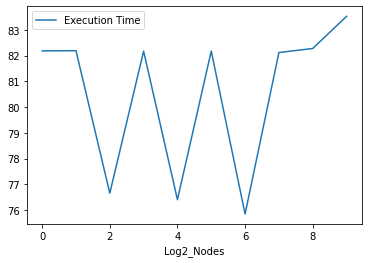

In [ ]:
df_time_all_6.plot(kind='line', x='Log2_Nodes', y='Execution Time')

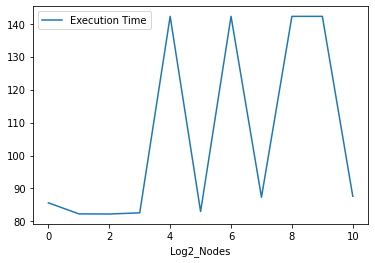

In [ ]:
df_time_all.plot(kind='line', x='Log2_Nodes', y='Execution Time')

In [ ]:
df_time_all['Execution Time Exp 6'] = df_time_all_6['Execution Time']

In [ ]:
df_time_all

Execution Time  Log2_Nodes  Execution Time Exp 6
0        85.630545         0.0             82.189312
1        82.279302         1.0             82.196573
2        82.234545         2.0             76.657098
3        82.592873         3.0             82.177993
4       142.243719         4.0             76.402777
5        82.984437         5.0             82.181808
6       142.256496         6.0             75.846418
7        87.329726         7.0             82.124198
8       142.245923         8.0             82.281765
9       142.248782         9.0             83.531847
10       87.624012        10.0                   NaN

Conclusion of Experiment 6: For `128 nodes` there was no difference in Execution Time for ADAM (82.12 secs) versus RMSProp (87.33 secs). So, I will leave the Optimizer as RMSProp for all future experiments.

# **EXPERIMENT 7:** 



Explore different Activation Functions to see if there is better performance available with `128 nodes`:

* Base Case: ReLu
* Alt 1: Sigmoid
* Alt 2: TanH
* Alt 3: PReLu (Parametric Rectified Linear Unit)
* Alt 4: ELU
* Alt 5: SoftPlus

https://www.tensorflow.org/api_docs/python/tf/nn



For Experiment 7, I decide to test my model on `128 Nodes`.

The difference between this Experiment 7 and previous Experiment 3 is that I choose different Activiation Functions. I keep Epochs=30

LeakyReLU(alpha=0.1)

In [ ]:

# Updated Code 2021-07-08

def run_model_exp_7(the_activation):
  model = Sequential([
    Dense(input_shape=[784], units = 128, activation = the_activation),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])
  model.compile(optimizer='rmsprop',           
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  start = time()
  history = model.fit(
    x_train
    ,y_train
    ,epochs = 30
    ,validation_data=(x_val, y_val)
    ,verbose=0
    )
  model_time = time() - start
  loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
  preds = model.predict(x_test)
  return model, history, loss, accuracy, preds, model_time

In [ ]:
activations = [tf.nn.relu, tf.nn.sigmoid, tf.nn.tanh, tf.nn.leaky_relu, tf.nn.elu, tf.nn.softplus]

In [ ]:
model_all_7 = []
history_all_7 = [] 
loss_all_7 = []
accuracy_all_7 = []
preds_all_7 = []
time_all_7 = []

for activation in activations:
  model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = run_model_exp_7(activation)
  model_all_7.append(model_temp)
  history_all_7.append(history_temp)
  loss_all_7.append(loss_temp)
  accuracy_all_7.append(accuracy_temp)
  preds_all_7.append(preds_temp)
  time_all_7.append(time_temp)
  print(f'Test set accuracy for {activation}: {accuracy_temp * 100}')

Test set accuracy for <function relu at 0x7f29a40ffcb0>: 97.78000116348267
Test set accuracy for <function sigmoid at 0x7f29a4015f80>: 97.79999852180481
Test set accuracy for <function tanh at 0x7f29a47b0170>: 97.58999943733215
Test set accuracy for <function leaky_relu at 0x7f29a10e8dd0>: 97.53999710083008
Test set accuracy for <function elu at 0x7f29a412cb90>: 97.57000207901001
Test set accuracy for <function softplus at 0x7f29a41107a0>: 97.40999937057495


In [ ]:
final_train_accs_7 = []
final_train_losses_7 = []
final_val_accs_7 = []
final_val_losses_7 = []
final_test_accs_7 = []
final_test_losses_7 = []
epochs_7 = []

for i in range(len(history_all_7)):
  temp_train_acc = history_all_7[i].history['accuracy'][-1]
  temp_train_loss = history_all_7[i].history['loss'][-1]
  temp_val_acc = history_all_7[i].history['val_accuracy'][-1]
  temp_val_loss = history_all_7[i].history['val_loss'][-1]
  temp_epoch = len(history_all_7[i].history['loss'])
  temp_test_acc = accuracy_all_7[i]
  temp_test_loss = loss_all_7[i]
  final_train_accs_7.append(temp_train_acc)
  final_train_losses_7.append(temp_train_loss)
  final_val_accs_7.append(temp_val_acc)
  final_val_losses_7.append(temp_val_loss)
  final_test_accs_7.append(temp_test_acc)
  final_test_losses_7.append(temp_test_loss)
  epochs_7.append(temp_epoch)


In [ ]:
final_df_7 = pd.DataFrame({'Model' : ['tf.nn.relu', 'tf.nn.sigmoid', 
                                      'tf.nn.tanh', 'tf.nn.leaky_relu', 
                                      'tf.nn.elu', 'tf.nn.softplus'],
                           'Final Train Accuracy' : final_train_accs_7,
                           'Final Train Loss' : final_train_losses_7,
                           'Final Val Accuracy' : final_val_accs_7,
                           'Final Val Loss' : final_val_losses_7,
                           'Test Accuracy' : final_test_accs_7,
                           'Test Loss' : final_test_losses_7,
                           'Model Time' : time_all_7}, 
                           columns=['Model', 'Final Train Accuracy',
                                    'Final Train Loss', 'Final Val Accuracy',
                                    'Final Val Loss', 'Test Accuracy',
                                    'Test Loss', 'Model Time'],
                           )

In [ ]:
final_df_7

Model  Final Train Accuracy  ...  Test Loss  Model Time
0        tf.nn.relu              0.999400  ...   0.162950  142.233631
1     tf.nn.sigmoid              0.996364  ...   0.092086   87.427049
2        tf.nn.tanh              0.999091  ...   0.106733  142.236320
3  tf.nn.leaky_relu              0.993836  ...   0.119790   87.556931
4         tf.nn.elu              0.997818  ...   0.140071   86.966782
5    tf.nn.softplus              0.997145  ...   0.162535   88.529670

[6 rows x 8 columns]

It would appear that `relu` is still the best activation function from all perpsectives, including accuracy and execution time.

So, I will leave the Activation Function as `relu` for all future experiments.



## Reviewing Performance

In [ ]:
history_dict_7 = history_all_7[0].history
history_dict_7.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses_7 = history_all_7[0].history['loss']
accs_7 = history_all_7[0].history['accuracy']
val_losses_7 = history_all_7[0].history['val_loss']
val_accs_7 = history_all_7[0].history['val_accuracy']
epochs_7 = len(losses_7)

### Plot performance metrics 

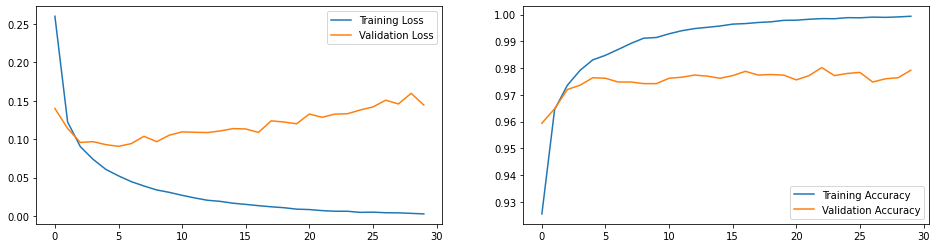

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_7, accs_7], [val_losses_7, val_accs_7], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_7), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_7), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Create the confusion matrix

In [ ]:
# Get the predicted classes:
pred_classes_7 = np.argmax(model_all_7[0].predict(x_train), axis=-1)
pred_classes_7

#Alt Code (Deprecated)
#pred_classes_2 = model_2.predict_classes(x_test)
#pred_classes_2

array([7, 3, 4, ..., 5, 6, 8])

In [ ]:
#conf_mx_2 = tf.math.confusion_matrix(y_test, pred_classes_2)
conf_mx_7 = confusion_matrix(y_train, pred_classes_7)
conf_mx_7;

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df_7 = pd.DataFrame(preds_all_7[0][0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df_7.style.format("{:.2%}").background_gradient(cmap=cm)

### Visualize the confusion matrix

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Note that the rows represent actual classes while the columns represent predicted classes.

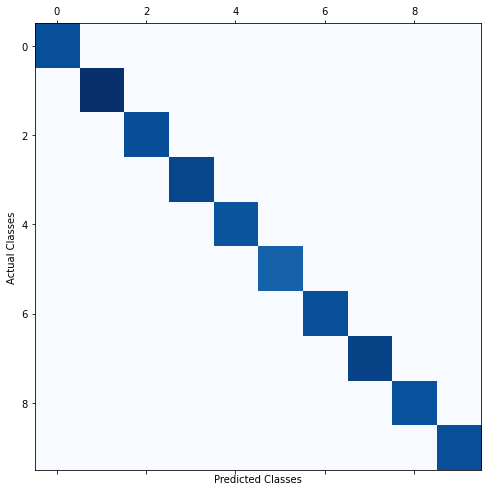

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx_7, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Confusion Matrix Error Rates

In [ ]:
row_sums_7 = conf_mx_7.sum(axis=1, keepdims=True)
norm_conf_mx_7 = conf_mx_7 / row_sums_7

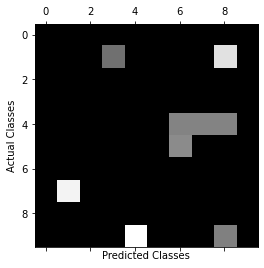

In [ ]:
np.fill_diagonal(norm_conf_mx_7, 0)
plt.matshow(norm_conf_mx_7, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **EXPERIMENT 8:** 



Explore Early Stopping to see if larger networks converge fasters



For Experiment 8, I decide to test my model on 2**n Nodes, with n ranging from 0 to 12. This will produce models with the following range of `Nodes = [1,2,4,8,16,32,64,128,256,512,1024,2048,4096]`

The difference between this Experiment 8 and previous Experiment 3 is that I choose enable early stopping to reduce total number of epochs.

In [ ]:
# Updated Code 2021-07-08

def run_model_exp_8(num_nodes):
  model = Sequential([
    Dense(input_shape=[784], units = num_nodes, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])
  model.compile(optimizer='adam',           
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  start = time()
  history = model.fit(
    x_train
    ,y_train
    ,epochs = 30
    ,validation_data=(x_val, y_val)
    ,verbose=0
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=1)]
    )
  model_time = time() - start
  loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
  preds = model.predict(x_test)
  return model, history, loss, accuracy, preds, model_time

In [ ]:
nodes_exp_8 = []

nodes_exp_8 = np.array(2**np.array(range(0,13)))
nodes_exp_8

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024,
       2048, 4096])

In [ ]:
model_all_8 = []
history_all_8 = [] 
loss_all_8 = []
accuracy_all_8 = []
preds_all_8 = []
time_all_8 = []

for node in nodes_exp_8:
  model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = run_model_exp_8(node)
  model_all_8.append(model_temp)
  history_all_8.append(history_temp)
  loss_all_8.append(loss_temp)
  accuracy_all_8.append(accuracy_temp)
  preds_all_8.append(preds_temp)
  time_all_8.append(time_temp)
  print(f'Test set accuracy for {node} Node: {accuracy_temp * 100}')

Test set accuracy for 1 Node: 31.690001487731934
Test set accuracy for 2 Node: 65.28000235557556
Test set accuracy for 4 Node: 85.00000238418579
Test set accuracy for 8 Node: 92.61999726295471
Test set accuracy for 16 Node: 93.70999932289124
Test set accuracy for 32 Node: 95.85000276565552
Test set accuracy for 64 Node: 96.92000150680542
Test set accuracy for 128 Node: 97.53000140190125
Test set accuracy for 256 Node: 97.78000116348267
Test set accuracy for 512 Node: 97.51999974250793
Test set accuracy for 1024 Node: 97.61000275611877
Test set accuracy for 2048 Node: 98.15000295639038
Test set accuracy for 4096 Node: 97.57000207901001


In [ ]:
final_train_accs_8 = []
final_train_losses_8 = []
final_val_accs_8 = []
final_val_losses_8 = []
final_test_accs_8 = []
final_test_losses_8 = []
epochs_8 = []

for i in range(len(history_all_8)):
  temp_train_acc = history_all_8[i].history['accuracy'][-1]
  temp_train_loss = history_all_8[i].history['loss'][-1]
  temp_val_acc = history_all_8[i].history['val_accuracy'][-1]
  temp_val_loss = history_all_8[i].history['val_loss'][-1]
  temp_epoch = len(history_all_8[i].history['loss'])
  temp_test_acc = accuracy_all_8[i]
  temp_test_loss = loss_all_8[i]
  final_train_accs_8.append(temp_train_acc)
  final_train_losses_8.append(temp_train_loss)
  final_val_accs_8.append(temp_val_acc)
  final_val_losses_8.append(temp_val_loss)
  final_test_accs_8.append(temp_test_acc)
  final_test_losses_8.append(temp_test_loss)
  epochs_8.append(temp_epoch)

In [ ]:
final_df_8 = pd.DataFrame({'Nodes' : nodes_exp_8,
                           'Epochs' : epochs_8, 
                           'Final Train Accuracy' : final_train_accs_8,
                           'Final Train Loss' : final_train_losses_8,
                           'Final Val Accuracy' : final_val_accs_8,
                           'Final Val Loss' : final_val_losses_8,
                           'Test Accuracy' : final_test_accs_8,
                           'Test Loss' : final_test_losses_8,
                           'Model Time' : time_all_8}, 
                           columns=['Nodes', 'Epochs', 'Final Train Accuracy',
                                    'Final Train Loss', 'Final Val Accuracy',
                                    'Final Val Loss', 'Test Accuracy',
                                    'Test Loss', 'Model Time'],
                           )

In [ ]:
final_df_8

Nodes  Epochs  Final Train Accuracy  ...  Test Accuracy  Test Loss  Model Time
0       1       6              0.311709  ...         0.3169   1.634402   16.100266
1       2      10              0.650200  ...         0.6528   1.060533   25.522558
2       4       6              0.851691  ...         0.8500   0.501962   15.483510
3       8       8              0.928818  ...         0.9262   0.262355   20.729259
4      16       5              0.941564  ...         0.9371   0.210711   13.048944
5      32       4              0.960800  ...         0.9585   0.140211   10.376320
6      64       6              0.982091  ...         0.9692   0.102500   15.729167
7     128       4              0.982345  ...         0.9753   0.076724   11.116425
8     256       5              0.988782  ...         0.9778   0.068710   13.941301
9     512       5              0.990673  ...         0.9752   0.074642   14.412301
10   1024       3              0.984073  ...         0.9761   0.083258    8.841159
11   2048       4              0.988400  ...         0.9815   0.064498   11.281264
12   4096       3              0.983527  ...         0.9757   0.080004    8.665961

[13 rows x 9 columns]

In [ ]:
final_df_8['Log2_Nodes'] = np.log2(final_df_8['Nodes'])

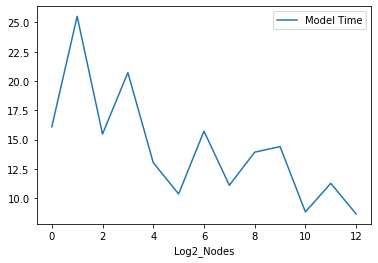

In [ ]:
final_df_8.plot(kind='line', x='Log2_Nodes', y='Model Time')

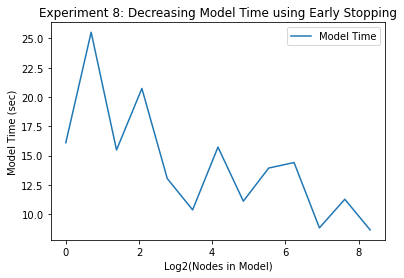

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(np.log(final_df_8['Nodes']), final_df_8['Model Time'], label='Model Time')
plt.xlabel('Log2(Nodes in Model)')
plt.ylabel('Model Time (sec)')
plt.title('Experiment 8: Decreasing Model Time using Early Stopping')
plt.legend()
plt.savefig('Experiment_8')
plt.show()

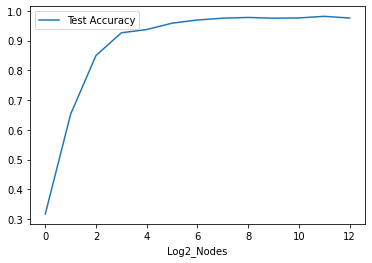

In [ ]:
final_df_8.plot(kind='line', x='Log2_Nodes', y='Test Accuracy')

## Reviewing Performance

Looks like the `1024 node` model performed the best, let's look at the performance graphs.:

In [ ]:
history_dict_8 = history_all_8[10].history
history_dict_8.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses_8 = history_all_8[10].history['loss']
accs_8 = history_all_8[10].history['accuracy']
val_losses_8 = history_all_8[10].history['val_loss']
val_accs_8 = history_all_8[10].history['val_accuracy']
epochs_8 = len(losses_8)

### Plot performance metrics 

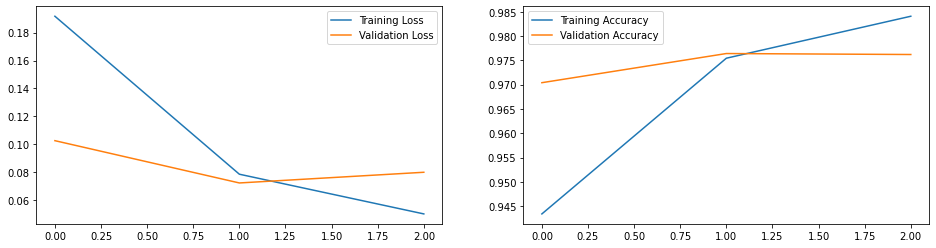

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_8, accs_8], [val_losses_8, val_accs_8], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_8), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_8), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Create the confusion matrix

In [ ]:
# Get the predicted classes:
pred_classes_8 = np.argmax(model_all_8[10].predict(x_train), axis=-1)
pred_classes_8

#Alt Code (Deprecated)
#pred_classes_2 = model_2.predict_classes(x_test)
#pred_classes_2

array([7, 3, 4, ..., 5, 6, 8])

In [ ]:
#conf_mx_2 = tf.math.confusion_matrix(y_test, pred_classes_2)
conf_mx_8 = confusion_matrix(y_train, pred_classes_8)
conf_mx_8;

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df_8 = pd.DataFrame(preds_all_8[10][0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df_8.style.format("{:.2%}").background_gradient(cmap=cm)

### Visualize the confusion matrix

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Note that the rows represent actual classes while the columns represent predicted classes.

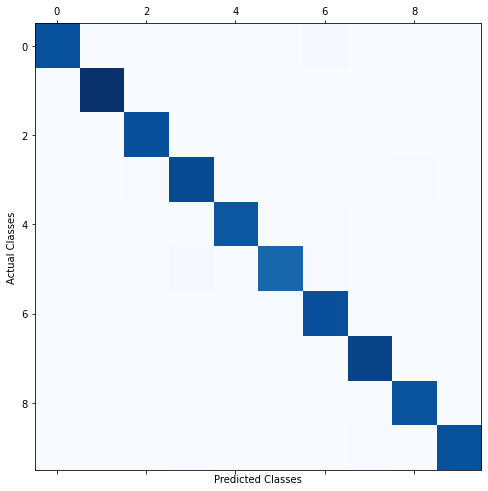

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx_8, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Confusion Matrix Error Rates

In [ ]:
row_sums_8 = conf_mx_8.sum(axis=1, keepdims=True)
norm_conf_mx_8 = conf_mx_8 / row_sums_8

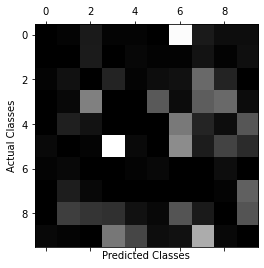

In [ ]:
np.fill_diagonal(norm_conf_mx_8, 0)
plt.matshow(norm_conf_mx_8, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **EXPERIMENT 9:** 



Determine Gaussian Distribution of `128 node` model, using early stopping (Patience = 2)








In [ ]:
# Updated Code 2021-07-08

def run_model_exp_9():
  model = Sequential([
    Dense(input_shape=[784], units = 128, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])
  model.compile(optimizer='adam',           
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  start = time()
  history = model.fit(
    x_train
    ,y_train
    ,epochs = 200
    ,validation_data=(x_val, y_val)
    ,verbose=0
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )
  model_time = time() - start
  loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
  preds = model.predict(x_test)
  return model, history, loss, accuracy, preds, model_time

In [ ]:
model_all_9 = []
history_all_9 = [] 
loss_all_9 = []
accuracy_all_9 = []
preds_all_9 = []
time_all_9 = []

for test in range(0,50):
  model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = run_model_exp_9()
  model_all_9.append(model_temp)
  history_all_9.append(history_temp)
  loss_all_9.append(loss_temp)
  accuracy_all_9.append(accuracy_temp)
  preds_all_9.append(preds_temp)
  time_all_9.append(time_temp)
  print(f'Test set accuracy for Test {test} ({time_temp} sec): {accuracy_temp * 100}')

Test set accuracy for Test 0 (16.64205527305603 sec): 97.72999882698059
Test set accuracy for Test 1 (21.47824501991272 sec): 97.79000282287598
Test set accuracy for Test 2 (32.0445442199707 sec): 97.94999957084656
Test set accuracy for Test 3 (24.411494970321655 sec): 97.79000282287598
Test set accuracy for Test 4 (19.08353066444397 sec): 97.69999980926514
Test set accuracy for Test 5 (24.540828227996826 sec): 97.7400004863739
Test set accuracy for Test 6 (18.90705370903015 sec): 97.72999882698059
Test set accuracy for Test 7 (18.745699167251587 sec): 97.72999882698059
Test set accuracy for Test 8 (24.367674589157104 sec): 97.65999913215637
Test set accuracy for Test 9 (21.867114782333374 sec): 97.72999882698059
Test set accuracy for Test 10 (29.488916397094727 sec): 97.67000079154968
Test set accuracy for Test 11 (27.066529989242554 sec): 97.8600025177002
Test set accuracy for Test 12 (27.267651557922363 sec): 97.85000085830688
Test set accuracy for Test 13 (21.98725199699402 sec): 9

In [ ]:
final_train_accs_9 = []
final_train_losses_9 = []
final_val_accs_9 = []
final_val_losses_9 = []
final_test_accs_9 = []
final_test_losses_9 = []
epochs_9 = []

for i in range(len(history_all_9)):
  temp_train_acc = history_all_9[i].history['accuracy'][-1]
  temp_train_loss = history_all_9[i].history['loss'][-1]
  temp_val_acc = history_all_9[i].history['val_accuracy'][-1]
  temp_val_loss = history_all_9[i].history['val_loss'][-1]
  temp_epoch = len(history_all_9[i].history['loss'])
  temp_test_acc = accuracy_all_9[i]
  temp_test_loss = loss_all_9[i]
  final_train_accs_9.append(temp_train_acc)
  final_train_losses_9.append(temp_train_loss)
  final_val_accs_9.append(temp_val_acc)
  final_val_losses_9.append(temp_val_loss)
  final_test_accs_9.append(temp_test_acc)
  final_test_losses_9.append(temp_test_loss)
  epochs_9.append(temp_epoch)

In [ ]:
final_df_9 = pd.DataFrame({'Epochs' : epochs_9, 
                           'Final Train Accuracy' : final_train_accs_9,
                           'Final Train Loss' : final_train_losses_9,
                           'Final Val Accuracy' : final_val_accs_9,
                           'Final Val Loss' : final_val_losses_9,
                           'Test Accuracy' : final_test_accs_9,
                           'Test Loss' : final_test_losses_9,
                           'Model Time' : time_all_9}, 
                           columns=['Epochs', 'Final Train Accuracy',
                                    'Final Train Loss', 'Final Val Accuracy',
                                    'Final Val Loss', 'Test Accuracy',
                                    'Test Loss', 'Model Time'],
                           )

In [ ]:
final_df_9

Epochs  Final Train Accuracy  ...  Test Loss  Model Time
0        6              0.988364  ...   0.074142   16.642055
1        8              0.992818  ...   0.075646   21.478245
2       12              0.995618  ...   0.086873   32.044544
3        9              0.993964  ...   0.078637   24.411495
4        7              0.991545  ...   0.073110   19.083531
5        9              0.994018  ...   0.085141   24.540828
6        7              0.990727  ...   0.076311   18.907054
7        7              0.991091  ...   0.072546   18.745699
8        9              0.994400  ...   0.079416   24.367675
9        8              0.992291  ...   0.076756   21.867115
10      11              0.996291  ...   0.090047   29.488916
11      10              0.994927  ...   0.078226   27.066530
12      10              0.995291  ...   0.082969   27.267652
13       8              0.992382  ...   0.080317   21.987252
14      12              0.996600  ...   0.089650   32.738339
15       8              0.992945  ...   0.081815   21.750646
16      10              0.995345  ...   0.078781   27.005416
17      10              0.995036  ...   0.088584   27.344229
18      12              0.996982  ...   0.089449   33.287581
19      12              0.996673  ...   0.082732   32.686796
20       7              0.991182  ...   0.080805   19.372166
21       9              0.994091  ...   0.077481   24.716575
22       6              0.988364  ...   0.072551   16.538864
23       6              0.988782  ...   0.084166   16.315364
24       6              0.987782  ...   0.087414   16.662763
25       8              0.992964  ...   0.083956   21.719913
26      10              0.995618  ...   0.087821   26.904693
27       8              0.992236  ...   0.087220   21.565951
28       6              0.988855  ...   0.075521   16.206367
29       5              0.986145  ...   0.081698   13.570872
30       9              0.994509  ...   0.081890   24.392963
31       6              0.988418  ...   0.079696   16.277189
32       9              0.994200  ...   0.087508   23.861969
33       9              0.993073  ...   0.083980   24.310112
34      14              0.996927  ...   0.093208   37.099888
35       6              0.988527  ...   0.076969   16.672966
36       5              0.984273  ...   0.080850   13.714733
37       8              0.992964  ...   0.071655   21.592037
38       8              0.992673  ...   0.080115   21.506333
39       7              0.991255  ...   0.078430   18.868076
40      11              0.996055  ...   0.105386   29.127609
41       8              0.992400  ...   0.077956   21.490833
42      10              0.995218  ...   0.084493   26.656873
43       7              0.990291  ...   0.083826   19.803319
44      10              0.994800  ...   0.082798   27.054332
45       9              0.994000  ...   0.078152   24.154479
46      10              0.994927  ...   0.085138   26.921091
47       8              0.992764  ...   0.074306   21.550605
48       7              0.990764  ...   0.077626   19.099316
49       8              0.992436  ...   0.093440   21.660457

[50 rows x 8 columns]

In [ ]:
model_all_9[2].summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 128)               100480    
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


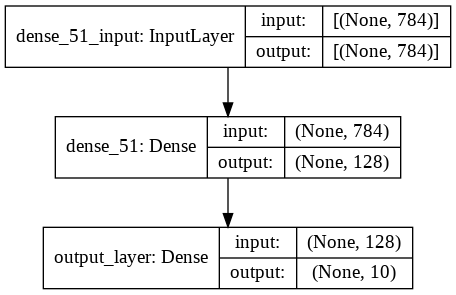

In [ ]:
keras.utils.plot_model(model_all_9[2], "mnist_model.png", show_shapes=True) 

Let's look at some histograms for this sampling of 50 tests.



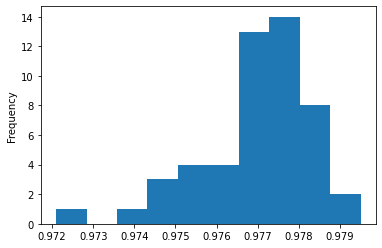

In [ ]:
final_df_9['Test Accuracy'].plot(kind='hist')

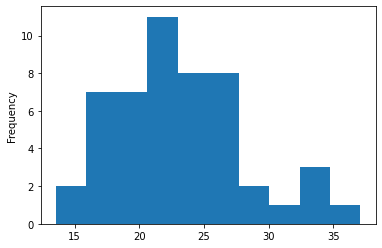

In [ ]:
final_df_9['Model Time'].plot(kind='hist')

In [ ]:
mean_9 = final_df_9['Test Accuracy'].mean()
std_9 = final_df_9['Test Accuracy'].std()
print(f'Mean Test Accuracy: {mean_9}')
print(f'STD  Test Accuracy: {std_9}')

Mean Test Accuracy: 0.9769620001316071
STD  Test Accuracy: 0.0013838559938700542


In [ ]:
mean_mt_9 = final_df_9['Model Time'].mean()
std_mt_9 = final_df_9['Model Time'].std()
print(f'Mean Model Time: {mean_mt_9}')
print(f'STD  Model Time: {std_mt_9}')

Mean Model Time: 23.042006163597108
STD  Model Time: 5.343961468920074


In [ ]:
mean_loss_9 = final_df_9['Test Loss'].mean()
std_loss_9 = final_df_9['Test Loss'].std()
print(f'Mean Test Loss: {mean_loss_9}')
print(f'STD  Test Loss: {std_loss_9}')

Mean Test Loss: 0.08194411307573318
STD  Test Loss: 0.006400798284945645


## Reviewing Performance

In [ ]:
final_df_9['Test Accuracy'].max()

0.9794999957084656

In [ ]:
final_df_9.iloc[2]

Epochs                  12.000000
Final Train Accuracy     0.995618
Final Train Loss         0.013451
Final Val Accuracy       0.979200
Final Val Loss           0.085915
Test Accuracy            0.979500
Test Loss                0.086873
Model Time              32.044544
Name: 2, dtype: float64

In [ ]:
history_dict_9 = history_all_9[2].history
history_dict_9.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses_9 = history_all_9[2].history['loss']
accs_9 = history_all_9[2].history['accuracy']
val_losses_9 = history_all_9[2].history['val_loss']
val_accs_9 = history_all_9[2].history['val_accuracy']
epochs_9 = len(losses_9)

### Plot performance metrics 

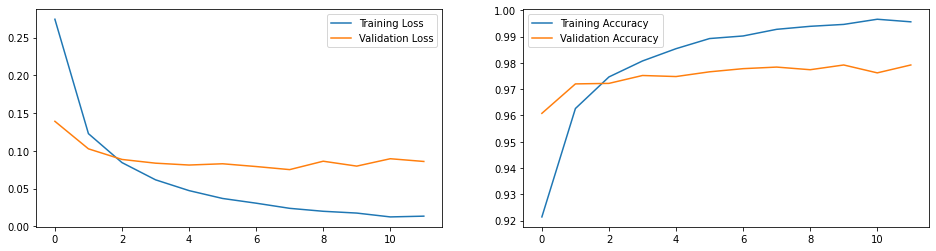

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_9, accs_9], [val_losses_9, val_accs_9], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_9), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_9), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Create the confusion matrix

In [ ]:
# Get the predicted classes:
pred_classes_9 = np.argmax(model_all_9[2].predict(x_train), axis=-1)
pred_classes_9

#Alt Code (Deprecated)
#pred_classes_2 = model_2.predict_classes(x_test)
#pred_classes_2

array([7, 3, 4, ..., 5, 6, 8])

In [ ]:
#conf_mx_2 = tf.math.confusion_matrix(y_test, pred_classes_2)
conf_mx_9 = confusion_matrix(y_train, pred_classes_9)
conf_mx_9;

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df_9 = pd.DataFrame(preds_all_9[46][0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df_9.style.format("{:.2%}").background_gradient(cmap=cm)

### Visualize the confusion matrix

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Note that the rows represent actual classes while the columns represent predicted classes.

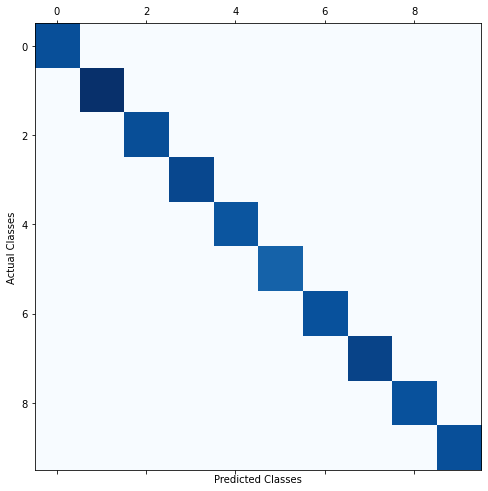

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx_9, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Confusion Matrix Error Rates

In [ ]:
row_sums_9 = conf_mx_9.sum(axis=1, keepdims=True)
norm_conf_mx_9 = conf_mx_9 / row_sums_9

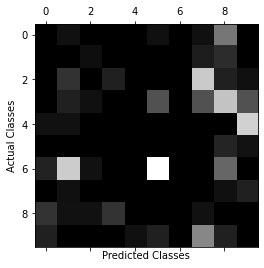

In [ ]:
np.fill_diagonal(norm_conf_mx_9, 0)
plt.matshow(norm_conf_mx_9, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **EXPERIMENT 10:**


Use PCA decomposition to reduce the number of dimensions of our training set of 28x28 dimensional MNIST images from 784 to 154 (with 95% of training images variance lying along these components). We also reduce the number of dimensions of 'best' model from `Experiment 3` to 154 inputs nodes and train it on the new lower dimensional data. We then compare the performance of Experiments 3 and 4.



## PCA Feature Reduction / Model Optimization 

<div class="alert alert-block alert-info">
    <b>Correlation matrix that measures the linear relationships</b><br> 
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
    </div>

### Use PCA decomposition to reduce the number of features from 784 features to 154 features 

In [ ]:
# Separating out the features
# features = [*pixel_data][1:] # ['pix_val_0', 'pix_val_1',...]
# x = pixel_df.loc[:, features].values 

pca = PCA(n_components=154)
pca.fit(x_train)
pca_x_train_10 = pca.transform(x_train)
pca_x_test_10 = pca.transform(x_test)
pca_x_val_10 = pca.transform(x_val)

In [ ]:
pca_x_train_10.shape

(55000, 154)

In [ ]:
pca_x_test_10.shape

(10000, 154)

In [ ]:
pca_x_val_10.shape

(5000, 154)

In [ ]:
pca.explained_variance_ratio_

array([0.097, 0.071, 0.062, 0.054, 0.049, 0.043, 0.033, 0.029, 0.028,
       0.024, 0.021, 0.02 , 0.017, 0.017, 0.016, 0.015, 0.013, 0.013,
       0.012, 0.012, 0.011, 0.01 , 0.01 , 0.009, 0.009, 0.008, 0.008,
       0.008, 0.007, 0.007, 0.007, 0.007, 0.006, 0.006, 0.006, 0.005,
       0.005, 0.005, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004,
       0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001,

## Creating the NN Model

### Specify the network architecture

### Build the NN model

Determine Gaussian Distribution of `1024 node` model with PCA reduction to only `154 dimensions`, using early stopping (Patience = 2)



In [ ]:
# Updated Code 2021-07-08

def run_model_exp_10():
  model = Sequential([
    Dense(input_shape=[154], units = 1024, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])
  model.compile(optimizer='adam',           
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  start = time()
  history = model.fit(
    pca_x_train_10
    ,y_train
    ,epochs = 200
    ,validation_data=(pca_x_val_10, y_val)
    ,verbose=0
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=1)]
    )
  model_time = time() - start
  loss, accuracy = model.evaluate(pca_x_test_10, y_test, verbose=0)
  preds = model.predict(pca_x_test_10)
  return model, history, loss, accuracy, preds, model_time

In [ ]:
model_all_10 = []
history_all_10 = [] 
loss_all_10 = []
accuracy_all_10 = []
preds_all_10 = []
time_all_10 = []

for test in range(0,50):
  model_temp, history_temp, loss_temp, accuracy_temp, preds_temp, time_temp = run_model_exp_10()
  model_all_10.append(model_temp)
  history_all_10.append(history_temp)
  loss_all_10.append(loss_temp)
  accuracy_all_10.append(accuracy_temp)
  preds_all_10.append(preds_temp)
  time_all_10.append(time_temp)
  print(f'Test set accuracy for Test {test} ({time_temp} sec): {accuracy_temp * 100}')

Test set accuracy for Test 0 (8.528244018554688 sec): 97.58999943733215
Test set accuracy for Test 1 (11.068789720535278 sec): 97.54999876022339
Test set accuracy for Test 2 (10.9493248462677 sec): 97.65999913215637
Test set accuracy for Test 3 (13.660199642181396 sec): 97.86999821662903
Test set accuracy for Test 4 (10.822237253189087 sec): 97.53999710083008
Test set accuracy for Test 5 (11.029133319854736 sec): 98.01999926567078
Test set accuracy for Test 6 (10.728885650634766 sec): 97.65999913215637
Test set accuracy for Test 7 (10.95946455001831 sec): 97.60000109672546
Test set accuracy for Test 8 (11.10435700416565 sec): 97.65999913215637
Test set accuracy for Test 9 (8.211666345596313 sec): 97.54999876022339
Test set accuracy for Test 10 (8.341973781585693 sec): 97.5600004196167
Test set accuracy for Test 11 (13.650696039199829 sec): 97.71000146865845
Test set accuracy for Test 12 (8.00385332107544 sec): 97.72999882698059
Test set accuracy for Test 13 (10.964175939559937 sec): 97

In [ ]:
final_train_accs_10 = []
final_train_losses_10 = []
final_val_accs_10 = []
final_val_losses_10 = []
final_test_accs_10 = []
final_test_losses_10 = []
epochs_10 = []

for i in range(len(history_all_10)):
  temp_train_acc = history_all_10[i].history['accuracy'][-1]
  temp_train_loss = history_all_10[i].history['loss'][-1]
  temp_val_acc = history_all_10[i].history['val_accuracy'][-1]
  temp_val_loss = history_all_10[i].history['val_loss'][-1]
  temp_epoch = len(history_all_10[i].history['loss'])
  temp_test_acc = accuracy_all_10[i]
  temp_test_loss = loss_all_10[i]
  final_train_accs_10.append(temp_train_acc)
  final_train_losses_10.append(temp_train_loss)
  final_val_accs_10.append(temp_val_acc)
  final_val_losses_10.append(temp_val_loss)
  final_test_accs_10.append(temp_test_acc)
  final_test_losses_10.append(temp_test_loss)
  epochs_10.append(temp_epoch)

In [ ]:
final_df_10 = pd.DataFrame({'Epochs' : epochs_10, 
                           'Final Train Accuracy' : final_train_accs_10,
                           'Final Train Loss' : final_train_losses_10,
                           'Final Val Accuracy' : final_val_accs_10,
                           'Final Val Loss' : final_val_losses_10,
                           'Test Accuracy' : final_test_accs_10,
                           'Test Loss' : final_test_losses_10,
                           'Model Time' : time_all_10}, 
                           columns=['Epochs', 'Final Train Accuracy',
                                    'Final Train Loss', 'Final Val Accuracy',
                                    'Final Val Loss', 'Test Accuracy',
                                    'Test Loss', 'Model Time'],
                           )

In [ ]:
final_df_10

Epochs  Final Train Accuracy  ...  Test Loss  Model Time
0        3              0.989018  ...   0.078123    8.528244
1        4              0.994036  ...   0.079935   11.068790
2        4              0.992800  ...   0.088155   10.949325
3        5              0.995436  ...   0.083460   13.660200
4        4              0.993291  ...   0.085550   10.822237
5        4              0.992800  ...   0.067836   11.029133
6        4              0.993564  ...   0.083597   10.728886
7        4              0.993200  ...   0.073577   10.959465
8        4              0.993836  ...   0.075314   11.104357
9        3              0.988345  ...   0.078323    8.211666
10       3              0.989073  ...   0.078586    8.341974
11       5              0.994964  ...   0.083456   13.650696
12       3              0.987927  ...   0.077503    8.003853
13       4              0.993273  ...   0.076004   10.964176
14       4              0.993873  ...   0.078931   10.883625
15       3              0.988655  ...   0.075799    9.100092
16       3              0.989200  ...   0.073967    8.297681
17       6              0.995564  ...   0.090145   16.275128
18       4              0.993200  ...   0.072739   11.045648
19       3              0.988836  ...   0.072335    8.301354
20       4              0.993527  ...   0.076099   10.750867
21       5              0.995291  ...   0.081524   13.101567
22       5              0.995364  ...   0.072012   13.541985
23       3              0.989655  ...   0.078637    8.375090
24       4              0.993618  ...   0.085686   10.835518
25       6              0.996127  ...   0.087425   16.096698
26       7              0.996036  ...   0.084779   19.076170
27       4              0.993309  ...   0.073436   10.686625
28       4              0.993382  ...   0.079776   10.648654
29       3              0.989545  ...   0.071160    8.038861
30       4              0.993145  ...   0.075326   10.736511
31       3              0.988873  ...   0.075286    8.176011
32       4              0.994073  ...   0.077813   10.620081
33       5              0.995436  ...   0.080692   13.330258
34       4              0.993073  ...   0.078022   10.922073
35       6              0.996473  ...   0.088201   15.602962
36       9              0.997982  ...   0.118900   23.386637
37       4              0.992964  ...   0.084447   10.873593
38       5              0.995418  ...   0.085295   13.169639
39       4              0.993636  ...   0.071335   10.896609
40       3              0.989382  ...   0.077166    8.239088
41       4              0.992982  ...   0.071067   10.567370
42       3              0.988145  ...   0.068975    8.271624
43       6              0.995436  ...   0.094938   15.688367
44       3              0.988745  ...   0.071744    8.242390
45       5              0.994909  ...   0.088863   13.534819
46       3              0.989164  ...   0.072294    8.185993
47       4              0.993182  ...   0.068823   10.728999
48       4              0.993073  ...   0.075039   10.691313
49       2              0.979964  ...   0.076399    6.274175

[50 rows x 8 columns]

Let's look at some histograms for this sampling of 50 tests.



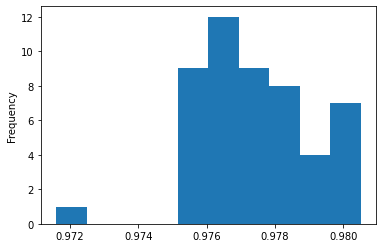

In [ ]:
final_df_10['Test Accuracy'].plot(kind='hist')

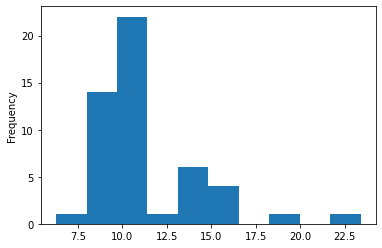

In [ ]:
final_df_10['Model Time'].plot(kind='hist')

In [ ]:
mean_10 = final_df_10['Test Accuracy'].mean()
std_10 = final_df_10['Test Accuracy'].std()
print(f'Mean Test Accuracy: {mean_10}')
print(f'STD  Test Accuracy: {std_10}')

Mean Test Accuracy: 0.9774079966545105
STD  Test Accuracy: 0.0016965571615188432


In [ ]:
mean_mt_10 = final_df_10['Model Time'].mean()
std_mt_10 = final_df_10['Model Time'].std()
print(f'Mean Model Time: {mean_mt_10}')
print(f'STD  Model Time: {std_mt_10}')

Mean Model Time: 11.224341468811035
STD  Model Time: 3.1311005066702036


## Reviewing Performance

In [ ]:
final_df_10['Test Accuracy'].max()

0.9807000160217285

In [ ]:
final_df_10.iloc[9]

Epochs                   4.000000
Final Train Accuracy     0.993255
Final Train Loss         0.022458
Final Val Accuracy       0.979800
Final Val Loss           0.073011
Test Accuracy            0.980700
Test Loss                0.069454
Model Time              15.537624
Name: 9, dtype: float64

In [ ]:
history_dict_10 = history_all_10[9].history
history_dict_10.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
losses_10 = history_all_10[10].history['loss']
accs_10 = history_all_10[10].history['accuracy']
val_losses_10 = history_all_10[10].history['val_loss']
val_accs_10 = history_all_10[10].history['val_accuracy']
epochs_10 = len(losses_10)

### Plot performance metrics 

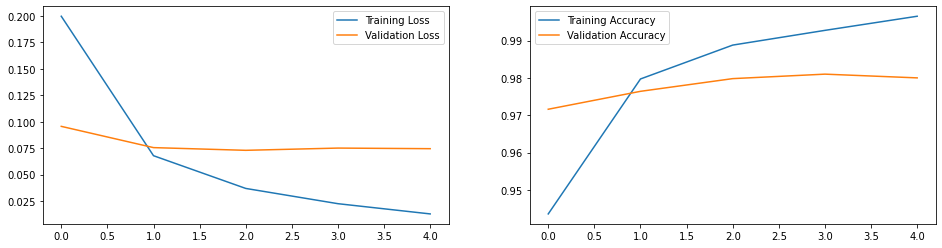

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_10, accs_10], [val_losses_10, val_accs_10], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_10), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_10), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Create the confusion matrix

In [ ]:
# Get the predicted classes:
pred_classes_10 = np.argmax(model_all_10[10].predict(pca_x_train_10), axis=-1)
pred_classes_10

#Alt Code (Deprecated)
#pred_classes_2 = model_2.predict_classes(x_test)
#pred_classes_2

array([7, 3, 4, ..., 5, 6, 8])

In [ ]:
#conf_mx_2 = tf.math.confusion_matrix(y_test, pred_classes_2)
conf_mx_10 = confusion_matrix(y_train, pred_classes_10)
conf_mx_10;

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df_10 = pd.DataFrame(preds_all_10[10][0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df_10.style.format("{:.2%}").background_gradient(cmap=cm)

### Visualize the confusion matrix

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Note that the rows represent actual classes while the columns represent predicted classes.

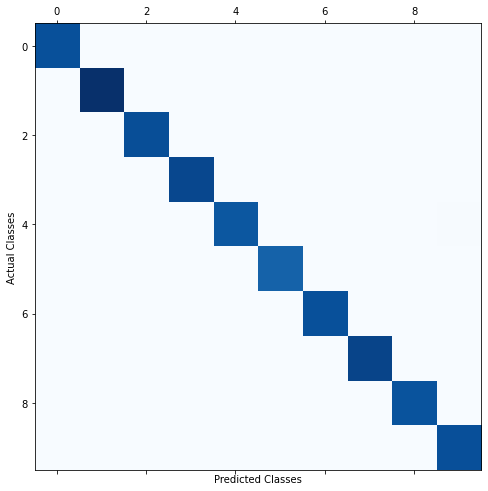

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx_10, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Confusion Matrix Error Rates

In [ ]:
row_sums_10 = conf_mx_10.sum(axis=1, keepdims=True)
norm_conf_mx_10 = conf_mx_10 / row_sums_10

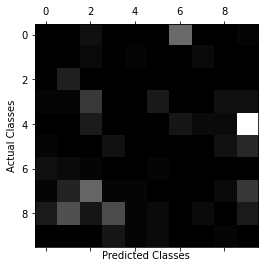

In [ ]:
np.fill_diagonal(norm_conf_mx_10, 0)
plt.matshow(norm_conf_mx_10, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html /content/Holst_Assignment_A_1_Computer_Vision.ipynb

[NbConvertApp] Converting notebook /content/Holst_Assignment_A_1_Computer_Vision.ipynb to html
[NbConvertApp] Writing 7808605 bytes to /content/Holst_Assignment_A_1_Computer_Vision.html
